# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import sys
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data Cleansing

In [2]:
rankings = pd.read_csv("fifa_ranking.csv")
rankings = rankings.replace({"IR Iran": "Iran"})
rankings['rank_date'] = pd.to_datetime(rankings['rank_date'])

In [3]:
matches = pd.read_csv("till-2022-results.csv")
matches =  matches.replace({'Germany DR': 'Germany', 'China': 'China PR'})
matches['neutral'] =  matches['neutral'].replace({'TRUE': 1, 'FALSE': 0})
matches['date'] = pd.to_datetime(matches['date'])
matches['year'] = pd.DatetimeIndex(matches['date']).year

In [4]:
rankings = rankings.set_index(['rank_date'])\
            .groupby(['country_full'], group_keys=False)\
            .resample('D').first()\
            .fillna(method='ffill')\
            .reset_index()

In [5]:
elo_rating = pd.read_csv("ELO-rating/elo_rating.csv")
elo_rating = elo_rating.replace({"China": "China PR", 
                                 "Congo": "Congo PR", 
                                 "North Korea": "Korea DPR", 
                                 "United States": "USA", 
                                 "South Korea" : "Korea Republic", 
                                 "Turks and Caicos" : "Turks and Caicos Islands"})

In [6]:
rankings.T

,0,1,2,3,4,5,6,7,8,9,...,1830648,1830649,1830650,1830651,1830652,1830653,1830654,1830655,1830656,1830657
rank_date,2003-01-15 00:00:00,2003-01-16 00:00:00,2003-01-17 00:00:00,2003-01-18 00:00:00,2003-01-19 00:00:00,2003-01-20 00:00:00,2003-01-21 00:00:00,2003-01-22 00:00:00,2003-01-23 00:00:00,2003-01-24 00:00:00,...,2018-05-29 00:00:00,2018-05-30 00:00:00,2018-05-31 00:00:00,2018-06-01 00:00:00,2018-06-02 00:00:00,2018-06-03 00:00:00,2018-06-04 00:00:00,2018-06-05 00:00:00,2018-06-06 00:00:00,2018-06-07 00:00:00
rank,204.0,204.0,204.0,204.0,204.0,204.0,204.0,204.0,204.0,204.0,...,113.0,113.0,113.0,113.0,113.0,113.0,113.0,113.0,113.0,118.0
country_full,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,...,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe
country_abrv,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,...,ZIM,ZIM,ZIM,ZIM,ZIM,ZIM,ZIM,ZIM,ZIM,ZIM
total_points,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,286.55,286.55,286.55,286.55,286.55,286.55,286.55,286.55,286.55,264.59
previous_points,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,295.0,295.0,295.0,295.0,295.0,295.0,295.0,295.0,295.0,287.0
rank_change,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-5.0
cur_year_avg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,136.13,136.13,136.13,136.13,136.13,136.13,136.13,136.13,136.13,133.45
cur_year_avg_weighted,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,136.13,136.13,136.13,136.13,136.13,136.13,136.13,136.13,136.13,133.45
last_year_avg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,169.96,169.96,169.96,169.96,169.96,169.96,169.96,169.96,169.96,97.54


In [7]:
matches.T

,0,1,2,3,4,5,6,7,8,9,...,44361,44362,44363,44364,44365,44366,44367,44368,44369,44370
date,1872-11-30 00:00:00,1873-03-08 00:00:00,1874-03-07 00:00:00,1875-03-06 00:00:00,1876-03-04 00:00:00,1876-03-25 00:00:00,1877-03-03 00:00:00,1877-03-05 00:00:00,1878-03-02 00:00:00,1878-03-23 00:00:00,...,2022-12-30 00:00:00,2022-12-30 00:00:00,2023-01-08 00:00:00,2023-01-09 00:00:00,2023-01-12 00:00:00,2023-01-12 00:00:00,2023-01-25 00:00:00,2023-01-28 00:00:00,2023-02-22 00:00:00,2023-02-26 00:00:00
home_team,Scotland,England,Scotland,England,Scotland,Scotland,England,Wales,Scotland,Scotland,...,Oman,United Arab Emirates,Iceland,Sweden,Finland,Sweden,United States,United States,Grenada,Grenada
away_team,England,Scotland,England,Scotland,England,Wales,Scotland,Scotland,England,Wales,...,Syria,Lebanon,Estonia,Finland,Estonia,Iceland,Serbia,Colombia,Barbados,Barbados
home_score,0,4,2,2,3,4,1,0,7,9,...,1,1,1,2,0,2,1,0,1,2
away_score,0,2,1,2,0,0,3,2,2,0,...,0,0,1,0,1,1,2,0,1,2
tournament,Friendly,Friendly,Friendly,Friendly,Friendly,Friendly,Friendly,Friendly,Friendly,Friendly,...,Friendly,Friendly,Friendly,Friendly,Friendly,Friendly,Friendly,Friendly,Friendly,Friendly
city,Glasgow,London,Glasgow,London,Glasgow,Glasgow,London,Wrexham,Glasgow,Glasgow,...,Dubai,Abu Dhabi,Albufeira,Faro-Loulé,Albufeira,Faro-Loulé,Los Angeles,Carson,Sauteurs,St. George's
country,Scotland,England,Scotland,England,Scotland,Scotland,England,Wales,Scotland,Scotland,...,United Arab Emirates,United Arab Emirates,Portugal,Portugal,Portugal,Portugal,United States,United States,Grenada,Grenada
neutral,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,True,True,False,False,False,False
year,1872,1873,1874,1875,1876,1876,1877,1877,1878,1878,...,2022,2022,2023,2023,2023,2023,2023,2023,2023,2023


In [8]:
elo_rating.T

,0,1,2,3,4,5,6,7,8,9,...,7126,7127,7128,7129,7130,7131,7132,7133,7134,7135
country,Germany,France,England,Argentina,Italy,Netherlands,Brazil,Yugoslavia,Soviet Union,Ireland,...,Falkland Islands,Micronesia,Bhutan,Anguilla,Kiribati,Tonga,Niue,American Samoa,Northern Mariana Islands,Palau
elo,2087,2009,1987,1983,1971,1962,1960,1943,1922,1912,...,580,565,563,563,545,529,496,473,409,403
year,1992,1992,1992,1992,1992,1992,1992,1992,1992,1992,...,2022,2022,2022,2022,2022,2022,2022,2022,2022,2022


# Merging Dataframes

In [9]:
matches = matches.merge(rankings, 
                        left_on=['date', 'home_team'], 
                        right_on=['rank_date', 'country_full'])
matches.head().T

,0,1,2,3,4
date,1993-08-08 00:00:00,1993-08-08 00:00:00,1993-08-08 00:00:00,1993-08-08 00:00:00,1993-08-08 00:00:00
home_team,Bolivia,Brazil,Ecuador,Guinea,Paraguay
away_team,Uruguay,Mexico,Venezuela,Sierra Leone,Argentina
home_score,3,1,5,1,1
away_score,1,1,0,0,3
tournament,FIFA World Cup qualification,Friendly,FIFA World Cup qualification,Friendly,FIFA World Cup qualification
city,La Paz,Maceió,Quito,Conakry,Asunción
country,Bolivia,Brazil,Ecuador,Guinea,Paraguay
neutral,False,False,False,False,False
year,1993,1993,1993,1993,1993


In [10]:
matches = matches.merge(rankings, 
                        left_on=['date', 'away_team'], 
                        right_on=['rank_date', 'country_full'], 
                        suffixes=('_home', '_away'))
matches.head().T

,0,1,2,3,4
date,1993-08-08 00:00:00,1993-08-08 00:00:00,1993-08-08 00:00:00,1993-08-08 00:00:00,1993-08-08 00:00:00
home_team,Bolivia,Brazil,Ecuador,Guinea,Paraguay
away_team,Uruguay,Mexico,Venezuela,Sierra Leone,Argentina
home_score,3,1,5,1,1
away_score,1,1,0,0,3
tournament,FIFA World Cup qualification,Friendly,FIFA World Cup qualification,Friendly,FIFA World Cup qualification
city,La Paz,Maceió,Quito,Conakry,Asunción
country,Bolivia,Brazil,Ecuador,Guinea,Paraguay
neutral,False,False,False,False,False
year,1993,1993,1993,1993,1993


In [11]:
matches = matches.merge(elo_rating, 
                        left_on=['home_team', 'year'], 
                        right_on=['country', 'year'])
matches.head().T

,0,1,2,3,4
date,1993-08-08 00:00:00,1993-08-15 00:00:00,1993-08-22 00:00:00,1993-08-08 00:00:00,1993-08-22 00:00:00
home_team,Bolivia,Bolivia,Bolivia,Brazil,Brazil
away_team,Uruguay,Ecuador,Venezuela,Mexico,Ecuador
home_score,3,1,7,1,2
away_score,1,0,0,1,0
tournament,FIFA World Cup qualification,FIFA World Cup qualification,FIFA World Cup qualification,Friendly,FIFA World Cup qualification
city,La Paz,La Paz,La Paz,Maceió,São Paulo
country_x,Bolivia,Bolivia,Bolivia,Brazil,Brazil
neutral,False,False,False,False,False
year,1993,1993,1993,1993,1993


In [12]:
matches = matches.merge(elo_rating, 
                        left_on=['away_team', 'year'], 
                        right_on=['country', 'year'], 
                        suffixes=('_home', '_away'))
matches.head().T

,0,1,2,3,4
date,1993-08-08 00:00:00,1993-09-19 00:00:00,1993-09-05 00:00:00,1993-10-13 00:00:00,1993-08-15 00:00:00
home_team,Bolivia,Brazil,Ecuador,Germany,Bolivia
away_team,Uruguay,Uruguay,Uruguay,Uruguay,Ecuador
home_score,3,2,0,5,1
away_score,1,0,1,0,0
tournament,FIFA World Cup qualification,FIFA World Cup qualification,FIFA World Cup qualification,Friendly,FIFA World Cup qualification
city,La Paz,Rio de Janeiro,Guayaquil,Karlsruhe,La Paz
country_x,Bolivia,Brazil,Ecuador,Germany,Bolivia
neutral,False,False,False,False,False
year,1993,1993,1993,1993,1993


In [13]:
matches = matches.drop(['country_y', 'country'], axis=1)

In [14]:
matches['country'] = matches['country_x']
matches = matches.drop(['country_x'], axis=1)

In [15]:
matches.T

,0,1,2,3,4,5,6,7,8,9,...,17514,17515,17516,17517,17518,17519,17520,17521,17522,17523
date,1993-08-08 00:00:00,1993-09-19 00:00:00,1993-09-05 00:00:00,1993-10-13 00:00:00,1993-08-15 00:00:00,1993-08-22 00:00:00,1993-09-12 00:00:00,1993-08-22 00:00:00,1993-09-05 00:00:00,1993-08-08 00:00:00,...,2018-03-27 00:00:00,2018-03-27 00:00:00,2018-03-27 00:00:00,2018-03-27 00:00:00,2018-05-29 00:00:00,2018-05-29 00:00:00,2018-06-03 00:00:00,2018-06-02 00:00:00,2018-06-05 00:00:00,2018-06-06 00:00:00
home_team,Bolivia,Brazil,Ecuador,Germany,Bolivia,Brazil,Venezuela,Bolivia,Brazil,Ecuador,...,Myanmar,Lebanon,Luxembourg,Yemen,Argentina,Panama,Costa Rica,El Salvador,Kazakhstan,Belarus
away_team,Uruguay,Uruguay,Uruguay,Uruguay,Ecuador,Ecuador,Ecuador,Venezuela,Venezuela,Venezuela,...,Macau,Malaysia,Austria,Nepal,Haiti,Northern Ireland,Northern Ireland,Honduras,Azerbaijan,Hungary
home_score,3,2,0,5,1,2,2,7,4,5,...,1,2,0,2,4,0,3,1,3,1
away_score,1,0,1,0,0,0,1,0,0,0,...,0,1,4,1,0,0,0,0,0,1
tournament,FIFA World Cup qualification,FIFA World Cup qualification,FIFA World Cup qualification,Friendly,FIFA World Cup qualification,FIFA World Cup qualification,FIFA World Cup qualification,FIFA World Cup qualification,FIFA World Cup qualification,FIFA World Cup qualification,...,AFC Asian Cup qualification,AFC Asian Cup qualification,Friendly,AFC Asian Cup qualification,Friendly,Friendly,Friendly,Friendly,Friendly,Friendly
city,La Paz,Rio de Janeiro,Guayaquil,Karlsruhe,La Paz,São Paulo,Puerto Ordaz,La Paz,Belo Horizonte,Quito,...,Yangon,Beirut,Luxembourg,Doha,Buenos Aires,Panama City,San José,Houston,Astana,Brest
neutral,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
year,1993,1993,1993,1993,1993,1993,1993,1993,1993,1993,...,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018
rank_date_home,1993-08-08 00:00:00,1993-09-19 00:00:00,1993-09-05 00:00:00,1993-10-13 00:00:00,1993-08-15 00:00:00,1993-08-22 00:00:00,1993-09-12 00:00:00,1993-08-22 00:00:00,1993-09-05 00:00:00,1993-08-08 00:00:00,...,2018-03-27 00:00:00,2018-03-27 00:00:00,2018-03-27 00:00:00,2018-03-27 00:00:00,2018-05-29 00:00:00,2018-05-29 00:00:00,2018-06-03 00:00:00,2018-06-02 00:00:00,2018-06-05 00:00:00,2018-06-06 00:00:00


# Feature Extraction

In [16]:
def count_home_appearance(row):
    home_team = row['home_team']
    date = row['date']
    return len(matches[((matches['home_team'] == home_team) | (matches['away_team'] == home_team)) & (matches['date'] < date)])

def count_away_appearance(row):
    away_team = row['away_team']
    date = row['date']
    return len(matches[((matches['home_team'] == away_team) | (matches['away_team'] == away_team)) & (matches['date'] < date)])

def count_match_ups(row):
    home_team = row['home_team']
    away_team = row['away_team']
    date = row['date']
    return len(matches[((matches['home_team'] == home_team) & (matches['away_team'] == away_team)) & (matches['date'] < date)]) + len(matches[((matches['home_team'] == away_team) & (matches['away_team'] == home_team)) & (matches['date'] < date)])

In [17]:
matches['rank_difference'] = matches['rank_home'] - matches['rank_away']
matches['average_rank'] = (matches['rank_home'] + matches['rank_away'])/2
matches['score_difference'] = matches['home_score'] - matches['away_score']
matches['point_difference'] = matches['total_points_home'] - matches['total_points_away']
matches['elo_diff']  = matches['elo_home'] - matches['elo_away']
matches['is_stake'] = matches['tournament'] != 'Friendly'
matches['home_appearance'] = matches.apply(count_home_appearance, axis=1)
matches['away_appearance'] = matches.apply(count_away_appearance, axis=1)
matches['match_ups'] = matches.apply(count_match_ups, axis=1)

In [18]:
matches['is_won'] = matches['score_difference'] > 0
matches['is_draw'] = matches['score_difference'] == 0
matches['is_lose'] = matches['score_difference'] < 0

In [19]:
matches.to_csv('matches_merged.csv')

In [20]:
matches_2018 = matches[matches['date'] < '2018-06-07']

# Checking Data

## Check whether there was any matches held in the cities which are the venues of the 2018 world cup.

In [21]:
world_cup_2018_cities = ["Moscow", "Saint Petersburg", "Sochi", "Rostov-on-Don", "Volgograd", "Nizhny Novgorod", "Kazan", "Samara", "Saransk", "Kaliningrad", "	Yekaterinburg"]
matches_2018[matches_2018["city"].isin(world_cup_2018_cities)].T

,368,387,498,643,829,889,931,1050,1365,1586,...,16969,16974,16987,17200,17201,17209,17247,17463,17483,17484
date,1994-05-29 00:00:00,1994-09-07 00:00:00,1994-10-12 00:00:00,1995-03-29 00:00:00,1995-10-11 00:00:00,1995-05-06 00:00:00,1995-11-15 00:00:00,1996-09-01 00:00:00,1996-08-28 00:00:00,1996-05-29 00:00:00,...,2017-06-21 00:00:00,2017-06-17 00:00:00,2017-11-11 00:00:00,2017-06-24 00:00:00,2017-06-21 00:00:00,2017-03-28 00:00:00,2017-11-14 00:00:00,2018-03-23 00:00:00,2018-03-27 00:00:00,2018-06-05 00:00:00
home_team,Russia,Russia,Russia,Russia,Russia,Russia,Russia,Russia,Russia,Russia,...,Mexico,Russia,Russia,New Zealand,Russia,Russia,Russia,Russia,Russia,Russia
away_team,Slovakia,Germany,San Marino,Scotland,Greece,Faroe Islands,Finland,Cyprus,Brazil,United Arab Emirates,...,New Zealand,New Zealand,Argentina,Portugal,Portugal,Belgium,Spain,Brazil,France,Turkey
home_score,2,0,4,0,2,3,3,4,2,1,...,2,2,0,0,0,3,3,0,1,1
away_score,1,1,0,0,1,0,1,0,2,0,...,1,0,1,4,1,3,3,3,3,1
tournament,Friendly,Friendly,UEFA Euro qualification,UEFA Euro qualification,UEFA Euro qualification,UEFA Euro qualification,UEFA Euro qualification,FIFA World Cup qualification,Friendly,Friendly,...,Confederations Cup,Confederations Cup,Friendly,Confederations Cup,Confederations Cup,Friendly,Friendly,Friendly,Friendly,Friendly
city,Moscow,Moscow,Moscow,Moscow,Moscow,Moscow,Moscow,Moscow,Moscow,Moscow,...,Sochi,Saint Petersburg,Moscow,Saint Petersburg,Moscow,Sochi,Saint Petersburg,Moscow,Saint Petersburg,Moscow
neutral,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
year,1994,1994,1994,1995,1995,1995,1995,1996,1996,1996,...,2017,2017,2017,2017,2017,2017,2017,2018,2018,2018
rank_date_home,1994-05-29 00:00:00,1994-09-07 00:00:00,1994-10-12 00:00:00,1995-03-29 00:00:00,1995-10-11 00:00:00,1995-05-06 00:00:00,1995-11-15 00:00:00,1996-09-01 00:00:00,1996-08-28 00:00:00,1996-05-29 00:00:00,...,2017-06-21 00:00:00,2017-06-17 00:00:00,2017-11-11 00:00:00,2017-06-24 00:00:00,2017-06-21 00:00:00,2017-03-28 00:00:00,2017-11-14 00:00:00,2018-03-23 00:00:00,2018-03-27 00:00:00,2018-06-05 00:00:00


## Check whether `rank_date_home` is the same as `rank_date_away`

In [22]:
matches[matches["rank_date_home"] != matches["rank_date_away"]]

,date,home_team,away_team,home_score,away_score,tournament,city,neutral,year,rank_date_home,...,score_difference,point_difference,elo_diff,is_stake,home_appearance,away_appearance,match_ups,is_won,is_draw,is_lose


Hence, we drop one of the duplicates and rename the other one.

In [23]:
matches = matches.drop(columns = ["rank_date_away"])
matches.columns = matches.columns.str.replace('rank_date_home', 'rank_date')

## Check whether `country_full_home` is the same as `home_team`

In [24]:
matches[matches['country_full_home'] != matches['home_team']]

,date,home_team,away_team,home_score,away_score,tournament,city,neutral,year,rank_date,...,score_difference,point_difference,elo_diff,is_stake,home_appearance,away_appearance,match_ups,is_won,is_draw,is_lose


## Check whether `country_full_away` is the same as `away_team`

In [25]:
matches[matches['country_full_away'] != matches['away_team']]

,date,home_team,away_team,home_score,away_score,tournament,city,neutral,year,rank_date,...,score_difference,point_difference,elo_diff,is_stake,home_appearance,away_appearance,match_ups,is_won,is_draw,is_lose


Hence, we drop the `country_full_home` and `country_full_away`.

In [26]:
matches = matches.drop(columns = ["country_full_home", "country_full_away"])

## Check whether country name abbreviation is mapped one to one with country name

In [27]:
def isOneToOne(df, col1, col2):
    first = df.drop_duplicates([col1, col2]).groupby(col1)[col2].count().max()
    second = df.drop_duplicates([col1, col2]).groupby(col2)[col1].count().max()
    return first + second == 2

In [28]:
isOneToOne(matches, "country_abrv_home", "home_team")

True

In [29]:
isOneToOne(matches, "country_abrv_away", "away_team")

True

Hence, we drop the abbreviation due to redundancy.

In [30]:
matches = matches.drop(columns = ["country_abrv_home", "country_abrv_away"])

## Check whether there is mismatch on match day and date of ranking

In [31]:
matches[matches['date'] != matches['rank_date']]

,date,home_team,away_team,home_score,away_score,tournament,city,neutral,year,rank_date,...,score_difference,point_difference,elo_diff,is_stake,home_appearance,away_appearance,match_ups,is_won,is_draw,is_lose


In [32]:
matches = matches.drop(columns = ["rank_date"])

# Data Preprocessing

In [33]:
matches_2018 = matches[matches['date'] < '2018-06-07']

In [34]:
matches_2018.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'neutral', 'year', 'rank_home',
       'total_points_home', 'previous_points_home', 'rank_change_home',
       'cur_year_avg_home', 'cur_year_avg_weighted_home', 'last_year_avg_home',
       'last_year_avg_weighted_home', 'two_year_ago_avg_home',
       'two_year_ago_weighted_home', 'three_year_ago_avg_home',
       'three_year_ago_weighted_home', 'confederation_home', 'rank_away',
       'total_points_away', 'previous_points_away', 'rank_change_away',
       'cur_year_avg_away', 'cur_year_avg_weighted_away', 'last_year_avg_away',
       'last_year_avg_weighted_away', 'two_year_ago_avg_away',
       'two_year_ago_weighted_away', 'three_year_ago_avg_away',
       'three_year_ago_weighted_away', 'confederation_away', 'elo_home',
       'elo_away', 'country', 'rank_difference', 'average_rank',
       'score_difference', 'point_difference', 'elo_diff', 'is_stake',
       'home_appearance', 'aw

## Ordinal Encoding for categorical data

In [35]:
cat_cols = ['date', 'neutral', 'home_team', 'away_team', 
            "tournament", "city", "country", 'neutral',
            "confederation_home", "confederation_away", 'is_stake', 
            'is_won', 'is_draw', 'is_lose']

from sklearn.preprocessing import LabelEncoder

for col in cat_cols:
    encoder = LabelEncoder()
    if col == "home_team" or col == "away_team":
        encoder.fit(np.concatenate([matches_2018["home_team"], matches_2018["away_team"]]))
        matches_2018["home_team_ordinal"] = encoder.transform(matches_2018["home_team"])
        matches_2018["away_team_ordinal"] = encoder.transform(matches_2018["away_team"])
        continue
    encoder.fit(matches_2018[[col]])
    matches_2018[f"{col}_ordinal"] = encoder.transform(matches_2018[f"{col}"])

D:\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Simon\AppData\Local\Temp\ipykernel_12952\3683798396.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_2018[f"{col}_ordinal"] = encoder.transform(matches_2018[f"{col}"])
D:\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Simon\AppData\Local\Temp\ipykernel_12952\36837

In [36]:
matches_2018.T

,0,1,2,3,4,5,6,7,8,9,...,17514,17515,17516,17517,17518,17519,17520,17521,17522,17523
date,1993-08-08 00:00:00,1993-09-19 00:00:00,1993-09-05 00:00:00,1993-10-13 00:00:00,1993-08-15 00:00:00,1993-08-22 00:00:00,1993-09-12 00:00:00,1993-08-22 00:00:00,1993-09-05 00:00:00,1993-08-08 00:00:00,...,2018-03-27 00:00:00,2018-03-27 00:00:00,2018-03-27 00:00:00,2018-03-27 00:00:00,2018-05-29 00:00:00,2018-05-29 00:00:00,2018-06-03 00:00:00,2018-06-02 00:00:00,2018-06-05 00:00:00,2018-06-06 00:00:00
home_team,Bolivia,Brazil,Ecuador,Germany,Bolivia,Brazil,Venezuela,Bolivia,Brazil,Ecuador,...,Myanmar,Lebanon,Luxembourg,Yemen,Argentina,Panama,Costa Rica,El Salvador,Kazakhstan,Belarus
away_team,Uruguay,Uruguay,Uruguay,Uruguay,Ecuador,Ecuador,Ecuador,Venezuela,Venezuela,Venezuela,...,Macau,Malaysia,Austria,Nepal,Haiti,Northern Ireland,Northern Ireland,Honduras,Azerbaijan,Hungary
home_score,3,2,0,5,1,2,2,7,4,5,...,1,2,0,2,4,0,3,1,3,1
away_score,1,0,1,0,0,0,1,0,0,0,...,0,1,4,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
confederation_away_ordinal,3,3,3,3,3,3,3,3,3,3,...,0,0,5,0,2,5,5,2,5,5
is_stake_ordinal,1,1,1,0,1,1,1,1,1,1,...,1,1,0,1,0,0,0,0,0,0
is_won_ordinal,1,1,0,1,1,1,1,1,1,1,...,1,1,0,1,1,0,1,1,1,0
is_draw_ordinal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [37]:
sorted(matches_2018.columns)

['average_rank',
 'away_appearance',
 'away_score',
 'away_team',
 'away_team_ordinal',
 'city',
 'city_ordinal',
 'confederation_away',
 'confederation_away_ordinal',
 'confederation_home',
 'confederation_home_ordinal',
 'country',
 'country_ordinal',
 'cur_year_avg_away',
 'cur_year_avg_home',
 'cur_year_avg_weighted_away',
 'cur_year_avg_weighted_home',
 'date',
 'date_ordinal',
 'elo_away',
 'elo_diff',
 'elo_home',
 'home_appearance',
 'home_score',
 'home_team',
 'home_team_ordinal',
 'is_draw',
 'is_draw_ordinal',
 'is_lose',
 'is_lose_ordinal',
 'is_stake',
 'is_stake_ordinal',
 'is_won',
 'is_won_ordinal',
 'last_year_avg_away',
 'last_year_avg_home',
 'last_year_avg_weighted_away',
 'last_year_avg_weighted_home',
 'match_ups',
 'neutral',
 'neutral_ordinal',
 'point_difference',
 'previous_points_away',
 'previous_points_home',
 'rank_away',
 'rank_change_away',
 'rank_change_home',
 'rank_difference',
 'rank_home',
 'score_difference',
 'three_year_ago_avg_away',
 'three_ye

## Feature Engineering

In [38]:
info_cont_feat = ['rank_difference', 'average_rank', 'is_stake_ordinal', 'neutral_ordinal', 'match_ups', 'point_difference', 'elo_diff']
info_cate_feat = ['tournament_ordinal', 'city_ordinal', 'country_ordinal']

home_cont_feat = ['rank_home', 'total_points_home', 'home_appearance', 'rank_change_home', 'previous_points_home', 'elo_home']
home_cate_feat = ['home_team_ordinal', 'confederation_home_ordinal']

away_cont_feat = ['rank_away', 'total_points_away', 'away_appearance', 'rank_change_away', 'previous_points_away', 'elo_away']
away_cate_feat = ['away_team_ordinal', 'confederation_away_ordinal']

### Standardisation

In [39]:
matches_2018.T

,0,1,2,3,4,5,6,7,8,9,...,17514,17515,17516,17517,17518,17519,17520,17521,17522,17523
date,1993-08-08 00:00:00,1993-09-19 00:00:00,1993-09-05 00:00:00,1993-10-13 00:00:00,1993-08-15 00:00:00,1993-08-22 00:00:00,1993-09-12 00:00:00,1993-08-22 00:00:00,1993-09-05 00:00:00,1993-08-08 00:00:00,...,2018-03-27 00:00:00,2018-03-27 00:00:00,2018-03-27 00:00:00,2018-03-27 00:00:00,2018-05-29 00:00:00,2018-05-29 00:00:00,2018-06-03 00:00:00,2018-06-02 00:00:00,2018-06-05 00:00:00,2018-06-06 00:00:00
home_team,Bolivia,Brazil,Ecuador,Germany,Bolivia,Brazil,Venezuela,Bolivia,Brazil,Ecuador,...,Myanmar,Lebanon,Luxembourg,Yemen,Argentina,Panama,Costa Rica,El Salvador,Kazakhstan,Belarus
away_team,Uruguay,Uruguay,Uruguay,Uruguay,Ecuador,Ecuador,Ecuador,Venezuela,Venezuela,Venezuela,...,Macau,Malaysia,Austria,Nepal,Haiti,Northern Ireland,Northern Ireland,Honduras,Azerbaijan,Hungary
home_score,3,2,0,5,1,2,2,7,4,5,...,1,2,0,2,4,0,3,1,3,1
away_score,1,0,1,0,0,0,1,0,0,0,...,0,1,4,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
confederation_away_ordinal,3,3,3,3,3,3,3,3,3,3,...,0,0,5,0,2,5,5,2,5,5
is_stake_ordinal,1,1,1,0,1,1,1,1,1,1,...,1,1,0,1,0,0,0,0,0,0
is_won_ordinal,1,1,0,1,1,1,1,1,1,1,...,1,1,0,1,1,0,1,1,1,0
is_draw_ordinal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = matches_2018
X[info_cont_feat + home_cont_feat + away_cont_feat] = scaler.fit_transform(X[info_cont_feat + home_cont_feat + away_cont_feat])

C:\Users\Simon\AppData\Local\Temp\ipykernel_12952\2699753588.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[info_cont_feat + home_cont_feat + away_cont_feat] = scaler.fit_transform(X[info_cont_feat + home_cont_feat + away_cont_feat])


## Feature Importance

In [41]:
import xgboost

model = xgboost.XGBClassifier()
model.fit(matches_2018[info_cont_feat + home_cont_feat + away_cont_feat], matches_2018['is_won_ordinal'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

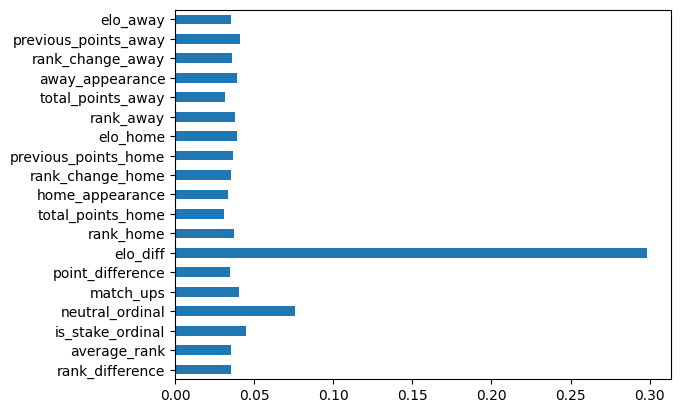

<Figure size 800x600 with 0 Axes>

In [42]:
# plot the graph of feature importances for better visualization 

feat_imp = pd.Series(model.feature_importances_, index=matches_2018[info_cont_feat + home_cont_feat + away_cont_feat].columns)
feat_imp.plot(kind='barh')

plt.figure(figsize=(8,6))
plt.show()

# Self-defined Neural Network

## Train-Test Split

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.loc[:, X.columns != 'is_won_ordinal'], X['is_won_ordinal'], test_size=0.2, random_state=42)

In [44]:
X_train = [X_train[info_cont_feat].values, 
           X_train[info_cate_feat].values,
           X_train[home_cont_feat].values,
           X_train[home_cate_feat].values,
           X_train[away_cont_feat].values,
           X_train[away_cate_feat].values]

X_test = [X_test[info_cont_feat].values, 
          X_test[info_cate_feat].values,
          X_test[home_cont_feat].values,
          X_test[home_cate_feat].values,
          X_test[away_cont_feat].values,
          X_test[away_cate_feat].values]

y_train = y_train.values
y_test = y_test.values

In [45]:
n_teams = len(matches_2018['home_team_ordinal'].unique())
n_confederations = len(matches_2018['confederation_home_ordinal'].unique())
n_tournaments = len(matches_2018['tournament_ordinal'].unique())
n_cities = len(matches_2018['city_ordinal'].unique())
n_countries = len(matches_2018['country_ordinal'].unique())

## K-Fold CV Grid Search

In [ ]:
from NeuNet import TripleTowersModel_GridSearchKFoldCV
ttm_binary_cv = TripleTowersModel_GridSearchKFoldCV(n_teams, n_confederations, n_tournaments, n_cities, n_countries, 
                                                    cv=5, 
                                                    patiences=[5],
                                                    embed_regs=[1e-2], 
                                                    dense_regs=[1e-2], 
                                                    fc_regs=[1e-2],
                                                    embedding_sizes=[250, 300], 
                                                    dense_sizes=[200, 250],
                                                    lrs=[1e-2], 
                                                    batches=[32, 64])

ttm_binary_cv.grid_search(X_train, y_train)

In [ ]:
ttm_binary_cv.best_model

## Fit the best model

In [46]:
from NeuNet import TripleTowersModel

binary_model = TripleTowersModel(n_teams, n_confederations, n_tournaments, n_cities, n_countries, 
                                 embedding_size=300, 
                                 dense_size=250, 
                                 embed_reg=1e-2, 
                                 dense_reg=1e-2, 
                                 fc_reg=1e-2)

In [47]:
import tensorflow as tf
from tensorflow import keras

metrics = [keras.metrics.AUC(name='AUC'), keras.metrics.Precision(name="precision"), keras.metrics.Recall(name="recall")]

binary_model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-2), loss=tf.keras.losses.BinaryCrossentropy(), metrics=metrics)

callbacks = [keras.callbacks.EarlyStopping(monitor='AUC', min_delta=0, patience=5, verbose=1, restore_best_weights=True)]

binary_model_history = binary_model.fit(x=X_train, y=y_train, batch_size=32, epochs=100, verbose=1, callbacks=callbacks)


Epoch 1/100
438/438 [==============================] - 4s 6ms/step - loss: 2.0038 - AUC: 0.7604 - precision: 0.6934 - recall: 0.6456
Epoch 2/100
438/438 [==============================] - 3s 6ms/step - loss: 0.6392 - AUC: 0.7758 - precision: 0.7002 - recall: 0.6768
Epoch 3/100
438/438 [==============================] - 3s 6ms/step - loss: 0.6706 - AUC: 0.7749 - precision: 0.7036 - recall: 0.6807
Epoch 4/100
438/438 [==============================] - 3s 6ms/step - loss: 0.6641 - AUC: 0.7773 - precision: 0.6904 - recall: 0.7045
Epoch 5/100
438/438 [==============================] - 3s 6ms/step - loss: 0.6631 - AUC: 0.7796 - precision: 0.6928 - recall: 0.7021
Epoch 6/100
438/438 [==============================] - 3s 6ms/step - loss: 0.6604 - AUC: 0.7801 - precision: 0.6900 - recall: 0.7065
Epoch 6: early stopping


## Prediction and Performance

In [48]:
y_pred = binary_model.predict(X_test)

110/110 [==============================] - 0s 2ms/step


In [49]:
y_pred

array([[0.3460891 ],
       [0.40799674],
       [0.42434523],
       ...,
       [0.5598172 ],
       [0.5360559 ],
       [0.6342111 ]], dtype=float32)

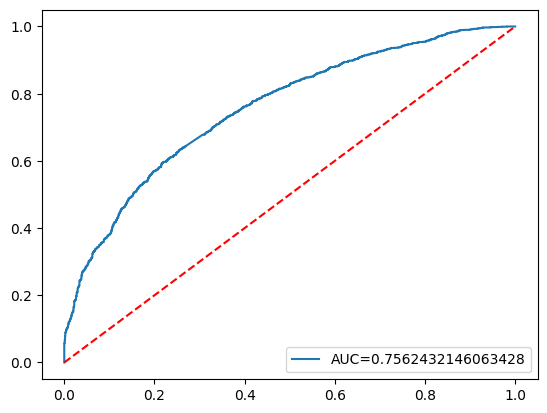

In [50]:
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4)
plt.show()

### Predict 2018 World Cup

Slice the data from `till-2022-results.csv`

In [51]:
world_cup_2018 = pd.read_csv("till-2022-results.csv")
world_cup_2018['year'] = pd.DatetimeIndex(world_cup_2018['date']).year
world_cup_2018 = world_cup_2018[world_cup_2018['year'] == 2018]
world_cup_2018 = world_cup_2018[world_cup_2018['tournament'] == 'FIFA World Cup']
world_cup_2018 = world_cup_2018.replace({"South Korea" : "Korea Republic"})
world_cup_2018['date'] = pd.to_datetime(world_cup_2018['date'])

In [52]:
world_cup_2018

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
40360,2018-06-14,Russia,Saudi Arabia,5,0,FIFA World Cup,Moscow,Russia,False,2018
40361,2018-06-15,Egypt,Uruguay,0,1,FIFA World Cup,Ekaterinburg,Russia,True,2018
40362,2018-06-15,Morocco,Iran,0,1,FIFA World Cup,Saint Petersburg,Russia,True,2018
40363,2018-06-15,Portugal,Spain,3,3,FIFA World Cup,Sochi,Russia,True,2018
40364,2018-06-16,France,Australia,2,1,FIFA World Cup,Kazan,Russia,True,2018
...,...,...,...,...,...,...,...,...,...,...
40420,2018-07-07,Russia,Croatia,2,2,FIFA World Cup,Sochi,Russia,False,2018
40421,2018-07-10,France,Belgium,1,0,FIFA World Cup,Saint Petersburg,Russia,True,2018
40422,2018-07-11,Croatia,England,2,1,FIFA World Cup,Moscow,Russia,True,2018
40423,2018-07-14,Belgium,England,2,0,FIFA World Cup,Saint Petersburg,Russia,True,2018


In [53]:
world_cup_rankings = rankings.loc[((rankings['country_full'].isin(world_cup_2018['home_team']) | rankings['country_full'].isin(world_cup_2018['away_team']))) & 
                                  ((rankings['rank_date'] < '2018-06-14') & (rankings['rank_date'] == rankings['rank_date'].max()))]

In [54]:
world_cup_rankings

,rank_date,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation
73707,2018-06-07,5.0,Argentina,ARG,1241.45,1254.0,0.0,404.07,404.07,809.59,404.80,829.98,248.99,917.94,183.59,CONMEBOL
100607,2018-06-07,36.0,Australia,AUS,718.33,700.0,4.0,366.60,366.60,387.55,193.77,327.21,98.16,298.94,59.79,AFC
172857,2018-06-07,3.0,Belgium,BEL,1298.32,1346.0,0.0,629.98,629.98,645.63,322.82,529.80,158.94,932.92,186.58,UEFA
240978,2018-06-07,2.0,Brazil,BRA,1430.57,1384.0,0.0,558.95,558.95,1082.36,541.18,560.21,168.06,811.88,162.38,CONMEBOL
383860,2018-06-07,16.0,Colombia,COL,985.97,989.0,0.0,292.09,292.09,655.57,327.78,665.76,199.73,831.89,166.38,CONMEBOL
420803,2018-06-07,23.0,Costa Rica,CRC,884.04,858.0,2.0,410.90,410.90,480.58,240.29,332.44,99.73,665.55,133.11,CONCACAF
429873,2018-06-07,20.0,Croatia,CRO,945.18,975.0,-2.0,397.75,397.75,672.78,336.39,335.96,100.79,551.26,110.25,UEFA
477708,2018-06-07,12.0,Denmark,DEN,1051.44,1054.0,0.0,723.72,723.72,314.88,157.44,300.24,90.07,401.06,80.21,UEFA
521998,2018-06-07,45.0,Egypt,EGY,649.43,636.0,1.0,208.27,208.27,582.07,291.04,331.62,99.48,253.18,50.64,CAF
540138,2018-06-07,12.0,England,ENG,1050.84,1040.0,1.0,476.42,476.42,593.51,296.75,580.49,174.15,517.60,103.52,UEFA


#### Merging Dataframes

In [55]:
world_cup_2018 = world_cup_2018.merge(world_cup_rankings, 
                                      left_on=['home_team'], 
                                      right_on=['country_full'])
world_cup_2018.head().T

,0,1,2,3,4
date,2018-06-14 00:00:00,2018-06-19 00:00:00,2018-06-25 00:00:00,2018-07-01 00:00:00,2018-07-07 00:00:00
home_team,Russia,Russia,Russia,Russia,Russia
away_team,Saudi Arabia,Egypt,Uruguay,Spain,Croatia
home_score,5,3,0,1,2
away_score,0,1,3,1,2
tournament,FIFA World Cup,FIFA World Cup,FIFA World Cup,FIFA World Cup,FIFA World Cup
city,Moscow,Saint Petersburg,Samara,Moscow,Sochi
country,Russia,Russia,Russia,Russia,Russia
neutral,False,False,False,False,False
year,2018,2018,2018,2018,2018


In [56]:
world_cup_2018 = world_cup_2018.merge(world_cup_rankings, 
                                      left_on=['away_team'], 
                                      right_on=['country_full'], 
                                      suffixes=('_home', '_away'))
world_cup_2018.head().T

,0,1,2,3,4
date,2018-06-14 00:00:00,2018-06-20 00:00:00,2018-06-19 00:00:00,2018-06-25 00:00:00,2018-06-25 00:00:00
home_team,Russia,Uruguay,Russia,Saudi Arabia,Russia
away_team,Saudi Arabia,Saudi Arabia,Egypt,Egypt,Uruguay
home_score,5,1,3,2,0
away_score,0,0,1,1,3
tournament,FIFA World Cup,FIFA World Cup,FIFA World Cup,FIFA World Cup,FIFA World Cup
city,Moscow,Rostov-on-Don,Saint Petersburg,Volgograd,Samara
country,Russia,Russia,Russia,Russia,Russia
neutral,False,True,False,True,False
year,2018,2018,2018,2018,2018


In [57]:
world_cup_2018 = world_cup_2018.merge(elo_rating, 
                                      left_on=['home_team', 'year'], 
                                      right_on=['country', 'year'])
world_cup_2018.head().T

,0,1,2,3,4
date,2018-06-14 00:00:00,2018-06-19 00:00:00,2018-06-25 00:00:00,2018-07-01 00:00:00,2018-07-07 00:00:00
home_team,Russia,Russia,Russia,Russia,Russia
away_team,Saudi Arabia,Egypt,Uruguay,Spain,Croatia
home_score,5,3,0,1,2
away_score,0,1,3,1,2
tournament,FIFA World Cup,FIFA World Cup,FIFA World Cup,FIFA World Cup,FIFA World Cup
city,Moscow,Saint Petersburg,Samara,Moscow,Sochi
country_x,Russia,Russia,Russia,Russia,Russia
neutral,False,False,False,False,False
year,2018,2018,2018,2018,2018


In [58]:
world_cup_2018 = world_cup_2018.merge(elo_rating, 
                                      left_on=['away_team', 'year'], 
                                      right_on=['country', 'year'], 
                                      suffixes=('_home', '_away'))
world_cup_2018.head().T

,0,1,2,3,4
date,2018-06-14 00:00:00,2018-06-20 00:00:00,2018-06-19 00:00:00,2018-06-25 00:00:00,2018-06-25 00:00:00
home_team,Russia,Uruguay,Russia,Saudi Arabia,Russia
away_team,Saudi Arabia,Saudi Arabia,Egypt,Egypt,Uruguay
home_score,5,1,3,2,0
away_score,0,0,1,1,3
tournament,FIFA World Cup,FIFA World Cup,FIFA World Cup,FIFA World Cup,FIFA World Cup
city,Moscow,Rostov-on-Don,Saint Petersburg,Volgograd,Samara
country_x,Russia,Russia,Russia,Russia,Russia
neutral,False,True,False,True,False
year,2018,2018,2018,2018,2018


In [59]:
world_cup_2018['country'] = world_cup_2018['country_x']
world_cup_2018 = world_cup_2018.drop(['country_y', 'country_x'], axis=1)

world_cup_2018.T

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
date,2018-06-14 00:00:00,2018-06-20 00:00:00,2018-06-19 00:00:00,2018-06-25 00:00:00,2018-06-25 00:00:00,2018-06-15 00:00:00,2018-07-01 00:00:00,2018-06-15 00:00:00,2018-06-20 00:00:00,2018-07-07 00:00:00,...,2018-06-17 00:00:00,2018-06-23 00:00:00,2018-06-27 00:00:00,2018-06-27 00:00:00,2018-06-27 00:00:00,2018-06-19 00:00:00,2018-06-24 00:00:00,2018-06-24 00:00:00,2018-06-28 00:00:00,2018-06-28 00:00:00
home_team,Russia,Uruguay,Russia,Saudi Arabia,Russia,Egypt,Russia,Portugal,Iran,Russia,...,Costa Rica,Germany,Mexico,Korea Republic,Serbia,Poland,Japan,Poland,Senegal,Japan
away_team,Saudi Arabia,Saudi Arabia,Egypt,Egypt,Uruguay,Uruguay,Spain,Spain,Spain,Croatia,...,Serbia,Sweden,Sweden,Germany,Brazil,Senegal,Senegal,Colombia,Colombia,Poland
home_score,5,1,3,2,0,0,1,3,0,2,...,0,2,0,2,0,1,2,0,0,0
away_score,0,0,1,1,3,1,1,3,1,2,...,1,1,3,0,2,2,2,3,1,1
tournament,FIFA World Cup,FIFA World Cup,FIFA World Cup,FIFA World Cup,FIFA World Cup,FIFA World Cup,FIFA World Cup,FIFA World Cup,FIFA World Cup,FIFA World Cup,...,FIFA World Cup,FIFA World Cup,FIFA World Cup,FIFA World Cup,FIFA World Cup,FIFA World Cup,FIFA World Cup,FIFA World Cup,FIFA World Cup,FIFA World Cup
city,Moscow,Rostov-on-Don,Saint Petersburg,Volgograd,Samara,Ekaterinburg,Moscow,Sochi,Kazan,Sochi,...,Samara,Sochi,Ekaterinburg,Kazan,Moscow,Moscow,Ekaterinburg,Kazan,Samara,Volgograd
neutral,False,True,False,True,False,True,False,True,True,False,...,True,True,True,True,True,True,True,True,True,True
year,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,...,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018
rank_date_home,2018-06-07 00:00:00,2018-06-07 00:00:00,2018-06-07 00:00:00,2018-06-07 00:00:00,2018-06-07 00:00:00,2018-06-07 00:00:00,2018-06-07 00:00:00,2018-06-07 00:00:00,2018-06-07 00:00:00,2018-06-07 00:00:00,...,2018-06-07 00:00:00,2018-06-07 00:00:00,2018-06-07 00:00:00,2018-06-07 00:00:00,2018-06-07 00:00:00,2018-06-07 00:00:00,2018-06-07 00:00:00,2018-06-07 00:00:00,2018-06-07 00:00:00,2018-06-07 00:00:00


#### Feature Extraction

In [60]:
world_cup_2018['rank_difference'] = world_cup_2018['rank_home'] - world_cup_2018['rank_away']
world_cup_2018['average_rank'] = (world_cup_2018['rank_home'] + world_cup_2018['rank_away'])/2
world_cup_2018['score_difference'] = world_cup_2018['home_score'] - world_cup_2018['away_score']
world_cup_2018['point_difference'] = world_cup_2018['total_points_home'] - world_cup_2018['total_points_away']
world_cup_2018['elo_diff']  = world_cup_2018['elo_home'] - world_cup_2018['elo_away']
world_cup_2018['is_stake'] = world_cup_2018['tournament'] != 'Friendly'
world_cup_2018['home_appearance'] = world_cup_2018.apply(count_home_appearance, axis=1)
world_cup_2018['away_appearance'] = world_cup_2018.apply(count_away_appearance, axis=1)
world_cup_2018['match_ups'] = world_cup_2018.apply(count_match_ups, axis=1)

In [61]:
world_cup_2018['is_won'] = world_cup_2018['score_difference'] > 0
world_cup_2018['is_draw'] = world_cup_2018['score_difference'] == 0
world_cup_2018['is_lose'] = world_cup_2018['score_difference'] < 0

#### Data Check

In [62]:
world_cup_2018[world_cup_2018["rank_date_home"] != world_cup_2018["rank_date_away"]]

,date,home_team,away_team,home_score,away_score,tournament,city,neutral,year,rank_date_home,...,score_difference,point_difference,elo_diff,is_stake,home_appearance,away_appearance,match_ups,is_won,is_draw,is_lose


Hence, we drop one of the duplicates and rename the other one.

In [63]:
world_cup_2018 = world_cup_2018.drop(columns = ["rank_date_away"])
world_cup_2018.columns = world_cup_2018.columns.str.replace('rank_date_home', 'rank_date')

In [64]:
world_cup_2018[world_cup_2018['country_full_home'] != world_cup_2018['home_team']]

,date,home_team,away_team,home_score,away_score,tournament,city,neutral,year,rank_date,...,score_difference,point_difference,elo_diff,is_stake,home_appearance,away_appearance,match_ups,is_won,is_draw,is_lose


In [65]:
world_cup_2018[world_cup_2018['country_full_away'] != world_cup_2018['away_team']]

,date,home_team,away_team,home_score,away_score,tournament,city,neutral,year,rank_date,...,score_difference,point_difference,elo_diff,is_stake,home_appearance,away_appearance,match_ups,is_won,is_draw,is_lose


Hence, we drop the `country_full_home` and `country_full_away`.

In [66]:
world_cup_2018 = world_cup_2018.drop(columns = ["country_full_home", "country_full_away"])

In [67]:
def isOneToOne(df, col1, col2):
    first = df.drop_duplicates([col1, col2]).groupby(col1)[col2].count().max()
    second = df.drop_duplicates([col1, col2]).groupby(col2)[col1].count().max()
    return first + second == 2

In [68]:
isOneToOne(world_cup_2018, "country_abrv_home", "home_team")

True

In [69]:
isOneToOne(world_cup_2018, "country_abrv_away", "away_team")

True

Hence, we drop the abbreviation due to redundancy.

In [70]:
world_cup_2018 = world_cup_2018.drop(columns = ["country_abrv_home", "country_abrv_away"])

In [71]:
world_cup_2018 = world_cup_2018.drop(columns = ["rank_date"])

In [72]:
world_cup_2018.dropna().sort_values(['date']).to_csv('world_cup_2018.csv')

#### Data Pre-processing

In [73]:
cat_cols = ['date', 'neutral', 'home_team', 'away_team', 
            "tournament", "city", "country", 'neutral',
            "confederation_home", "confederation_away", 'is_stake', 
            'is_won', 'is_draw', 'is_lose']

from sklearn.preprocessing import LabelEncoder

for col in cat_cols:
    encoder = LabelEncoder()
    if col == "home_team" or col == "away_team":
        encoder.fit(np.concatenate([world_cup_2018["home_team"], world_cup_2018["away_team"]]))
        world_cup_2018["home_team_ordinal"] = encoder.transform(world_cup_2018["home_team"])
        world_cup_2018["away_team_ordinal"] = encoder.transform(world_cup_2018["away_team"])
        continue
    encoder.fit(world_cup_2018[[col]])
    world_cup_2018[f"{col}_ordinal"] = encoder.transform(world_cup_2018[f"{col}"])

D:\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

In [74]:
info_cont_feat = ['rank_difference', 'average_rank', 'is_stake_ordinal', 'neutral_ordinal', 'match_ups', 'point_difference', 'elo_diff']
info_cate_feat = ['tournament_ordinal', 'city_ordinal', 'country_ordinal', 'neutral_ordinal']

home_cont_feat = ['rank_home', 'total_points_home', 'home_appearance', 'rank_change_home', 'previous_points_home', 'elo_home']
home_cate_feat = ['home_team_ordinal', 'confederation_home_ordinal']

away_cont_feat = ['rank_away', 'total_points_away', 'away_appearance', 'rank_change_away', 'previous_points_away', 'elo_away']
away_cate_feat = ['away_team_ordinal', 'confederation_away_ordinal']

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_wc = world_cup_2018
X_wc[info_cont_feat + home_cont_feat + away_cont_feat] = scaler.fit_transform(world_cup_2018[info_cont_feat + home_cont_feat + away_cont_feat])

In [76]:
X, y = matches_2018.loc[:, matches_2018.columns != 'is_won_ordinal'], matches_2018['is_won_ordinal']

In [77]:
X = [X[info_cont_feat].values, 
     X[info_cate_feat].values,
     X[home_cont_feat].values,
     X[home_cate_feat].values,
     X[away_cont_feat].values,
     X[away_cate_feat].values]

y = y.values

In [78]:
X_wc = [X_wc[info_cont_feat].values, X_wc[info_cate_feat].values,
        X_wc[home_cont_feat].values, X_wc[home_cate_feat].values,
        X_wc[away_cont_feat].values, X_wc[away_cate_feat].values]

y_wc = world_cup_2018['is_won_ordinal']*1

#### Model Re-construction

In [79]:
from NeuNet import TripleTowersModel

binary_model = TripleTowersModel(n_teams, n_confederations, n_tournaments, n_cities, n_countries, 
                                 embedding_size=300, 
                                 dense_size=250, 
                                 embed_reg=1e-2, 
                                 dense_reg=1e-2, 
                                 fc_reg=1e-2)

In [80]:
import tensorflow as tf
from tensorflow import keras

metrics = [keras.metrics.AUC(name='AUC'), keras.metrics.Precision(name="precision"), keras.metrics.Recall(name="recall")]

binary_model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-2), loss=tf.keras.losses.BinaryCrossentropy(), metrics=metrics)

callbacks = [keras.callbacks.EarlyStopping(monitor='AUC', min_delta=0, patience=5, verbose=1, restore_best_weights=True)]

binary_model_history = binary_model.fit(x=X, y=y, batch_size=32, epochs=100, verbose=1, callbacks=callbacks)


Epoch 1/100
548/548 [==============================] - 5s 6ms/step - loss: 1.7425 - AUC: 0.7568 - precision: 0.6901 - recall: 0.6454
Epoch 2/100
548/548 [==============================] - 3s 6ms/step - loss: 0.6627 - AUC: 0.7716 - precision: 0.7030 - recall: 0.6611
Epoch 3/100
548/548 [==============================] - 3s 6ms/step - loss: 0.6469 - AUC: 0.7734 - precision: 0.7083 - recall: 0.6565
Epoch 4/100
548/548 [==============================] - 3s 6ms/step - loss: 0.6541 - AUC: 0.7726 - precision: 0.7036 - recall: 0.6592
Epoch 5/100
548/548 [==============================] - 3s 6ms/step - loss: 0.6548 - AUC: 0.7742 - precision: 0.7088 - recall: 0.6565
Epoch 6/100
548/548 [==============================] - 3s 6ms/step - loss: 0.6581 - AUC: 0.7727 - precision: 0.7035 - recall: 0.6665
Epoch 6: early stopping


#### Prediction and Performance

In [81]:
y_pred = binary_model.predict(X_wc)

2/2 [==============================] - 0s 3ms/step


In [82]:
y_pred

array([[0.72518647],
       [0.75837195],
       [0.63706154],
       [0.38041076],
       [0.37733558],
       [0.19243519],
       [0.23511082],
       [0.4432889 ],
       [0.19201759],
       [0.39731166],
       [0.5452079 ],
       [0.55610067],
       [0.43400413],
       [0.302845  ],
       [0.21811897],
       [0.34230235],
       [0.33952555],
       [0.7551065 ],
       [0.7905173 ],
       [0.6677223 ],
       [0.5613859 ],
       [0.58916414],
       [0.25848994],
       [0.45541543],
       [0.16461241],
       [0.48450252],
       [0.6355579 ],
       [0.45494196],
       [0.65484464],
       [0.30061582],
       [0.34786394],
       [0.5444239 ],
       [0.65396637],
       [0.29110748],
       [0.67174786],
       [0.40849993],
       [0.30605176],
       [0.7297932 ],
       [0.56889033],
       [0.75026554],
       [0.7377513 ],
       [0.52341616],
       [0.47598538],
       [0.6626584 ],
       [0.39885384],
       [0.37550446],
       [0.46609494],
       [0.167

In [83]:
world_cup_2018['pred_win_prob'] = y_pred

In [84]:
world_cup_2018.T

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
date,2018-06-14 00:00:00,2018-06-20 00:00:00,2018-06-19 00:00:00,2018-06-25 00:00:00,2018-06-25 00:00:00,2018-06-15 00:00:00,2018-07-01 00:00:00,2018-06-15 00:00:00,2018-06-20 00:00:00,2018-07-07 00:00:00,...,2018-06-17 00:00:00,2018-06-23 00:00:00,2018-06-27 00:00:00,2018-06-27 00:00:00,2018-06-27 00:00:00,2018-06-19 00:00:00,2018-06-24 00:00:00,2018-06-24 00:00:00,2018-06-28 00:00:00,2018-06-28 00:00:00
home_team,Russia,Uruguay,Russia,Saudi Arabia,Russia,Egypt,Russia,Portugal,Iran,Russia,...,Costa Rica,Germany,Mexico,Korea Republic,Serbia,Poland,Japan,Poland,Senegal,Japan
away_team,Saudi Arabia,Saudi Arabia,Egypt,Egypt,Uruguay,Uruguay,Spain,Spain,Spain,Croatia,...,Serbia,Sweden,Sweden,Germany,Brazil,Senegal,Senegal,Colombia,Colombia,Poland
home_score,5,1,3,2,0,0,1,3,0,2,...,0,2,0,2,0,1,2,0,0,0
away_score,0,0,1,1,3,1,1,3,1,2,...,1,1,3,0,2,2,2,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
is_stake_ordinal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
is_won_ordinal,1,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
is_draw_ordinal,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,0,0
is_lose_ordinal,0,0,0,0,1,1,0,0,1,0,...,1,0,1,0,1,1,0,1,1,1


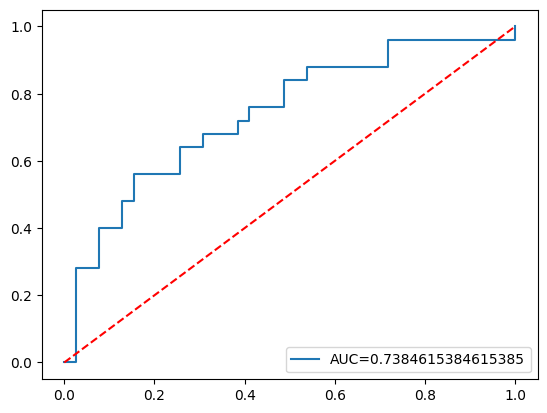

In [85]:
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, _ = metrics.roc_curve(y_wc, y_pred)
auc = metrics.roc_auc_score(y_wc, y_pred)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4)
plt.show()

In [86]:
WorldCup = pd.read_csv('WorldCup2018Dataset.csv')
WorldCup = WorldCup.replace({"IRAN": "Iran", 
                             "Costarica": "Costa Rica", 
                             "Porugal": "Portugal", 
                             "Columbia": "Colombia", 
                             "Korea" : "Korea Republic"})
WorldCup['points'] = 0

In [87]:
# Set up margin for 'draw' result
margin = 0.025

def prediction(row):
    if row['pred_win_prob'] < 0.5 - margin:
        return 'lose'
    elif row['pred_win_prob'] > 0.5 + margin:
        return 'win'
    else :
        return 'draw'

##### Group Stage Simulation

In [88]:
world_cup_2018_group_stage = world_cup_2018[world_cup_2018['date'] < '2018-06-29']

In [89]:
data = None
for group in WorldCup['Group'].dropna().unique():
    datum = world_cup_2018_group_stage.sort_values(by=['date'])[['home_team', 'away_team', 'is_won', 'is_draw', 'is_lose', 'pred_win_prob']][world_cup_2018['home_team'].isin(WorldCup['Team'][WorldCup['Group'] == group]) & 
                                                                                                       world_cup_2018['away_team'].isin(WorldCup['Team'][WorldCup['Group'] == group])]
    datum['Group'] = group
    datum['pred'] = datum.apply(prediction, axis=1)
    for i in range(6):
        if datum.iloc[i]['pred'] == 'win':
            WorldCup['points'][WorldCup['Team'] == datum.iloc[i]['home_team']] += 3
        elif datum.iloc[i]['pred'] == 'draw':
            WorldCup['points'][WorldCup['Team'] == datum.iloc[i]['home_team']] += 1
            WorldCup['points'][WorldCup['Team'] == datum.iloc[i]['away_team']] += 1
        elif datum.iloc[i]['pred'] == 'lose':
            WorldCup['points'][WorldCup['Team'] == datum.iloc[i]['away_team']] += 3
        
    data = pd.concat([data, datum])

print(len(data))
print(data.to_markdown())

48
|    | home_team      | away_team      | is_won   | is_draw   | is_lose   |   pred_win_prob | Group   | pred   |
|---:|:---------------|:---------------|:---------|:----------|:----------|----------------:|:--------|:-------|
|  0 | Russia         | Saudi Arabia   | True     | False     | False     |       0.725186  | A       | win    |
|  5 | Egypt          | Uruguay        | False    | False     | True      |       0.192435  | A       | lose   |
|  2 | Russia         | Egypt          | True     | False     | False     |       0.637062  | A       | win    |
|  1 | Uruguay        | Saudi Arabia   | True     | False     | False     |       0.758372  | A       | win    |
|  3 | Saudi Arabia   | Egypt          | True     | False     | False     |       0.380411  | A       | lose   |
|  4 | Russia         | Uruguay        | False    | False     | True      |       0.377336  | A       | lose   |
|  7 | Portugal       | Spain          | False    | True      | False     |       0.443289  |

C:\Users\Simon\AppData\Local\Temp\ipykernel_12952\2980252377.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  datum = world_cup_2018_group_stage.sort_values(by=['date'])[['home_team', 'away_team', 'is_won', 'is_draw', 'is_lose', 'pred_win_prob']][world_cup_2018['home_team'].isin(WorldCup['Team'][WorldCup['Group'] == group]) &
C:\Users\Simon\AppData\Local\Temp\ipykernel_12952\2980252377.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WorldCup['points'][WorldCup['Team'] == datum.iloc[i]['home_team']] += 3
C:\Users\Simon\AppData\Local\Temp\ipykernel_12952\2980252377.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [90]:
WorldCup[['Team', 'Group', 'points']].dropna().sort_values(by=['Group', 'points'], ascending=False)

,Team,Group,points
30,Colombia,H,9
28,Poland,H,6
29,Senegal,H,3
31,Japan,H,0
24,Belgium,G,9
27,England,G,6
26,Tunisia,G,3
25,Panama,G,0
20,Germany,F,9
21,Mexico,F,4


In [91]:
WorldCup[['Team', 'Group', 'points']].dropna().sort_values(by=['points'], ascending=False).groupby('Group').head(2).sort_values(by=['Group'])

,Team,Group,points
3,Uruguay,A,9
0,Russia,A,6
5,Spain,B,9
4,Portugal,B,6
8,France,C,9
11,Denmark,C,4
12,Argentina,D,9
14,Croatia,D,6
16,Brazil,E,9
17,Switzerland,E,6


We can only simulation the points but some teams in the same group can have the same points. By the rule, the team with goal difference will be promoted to the round of 16. This is a limitation of our method.

##### Round of 16 result comparison

In [92]:
world_cup_2018_r16 = world_cup_2018[(world_cup_2018['date'] > '2018-06-29') & (world_cup_2018['date'] < '2018-07-04')]

In [93]:
world_cup_2018_r16

,date,home_team,away_team,home_score,away_score,tournament,city,neutral,year,rank_home,...,tournament_ordinal,city_ordinal,country_ordinal,confederation_home_ordinal,confederation_away_ordinal,is_stake_ordinal,is_won_ordinal,is_draw_ordinal,is_lose_ordinal,pred_win_prob
6,2018-07-01,Russia,Spain,1,1,FIFA World Cup,Moscow,False,2018,2.083269,...,0,3,0,4,4,0.0,0,1,0,0.235111
13,2018-06-30,Uruguay,Portugal,2,1,FIFA World Cup,Sochi,True,2018,-0.463265,...,0,9,0,3,4,0.0,1,0,0,0.302845
23,2018-06-30,France,Argentina,4,3,FIFA World Cup,Kazan,True,2018,-0.781581,...,0,2,0,4,3,0.0,1,0,0,0.455415
31,2018-07-02,Brazil,Mexico,2,0,FIFA World Cup,Samara,True,2018,-1.008950,...,0,7,0,3,2,0.0,1,0,0,0.544424
35,2018-07-03,Sweden,Switzerland,1,0,FIFA World Cup,Saint Petersburg,True,2018,-0.008526,...,0,6,0,4,4,0.0,1,0,0,0.408500
42,2018-07-01,Croatia,Denmark,1,1,FIFA World Cup,Nizhny Novgorod,True,2018,-0.190422,...,0,4,0,4,4,0.0,0,1,0,0.475985
48,2018-07-03,Colombia,England,1,1,FIFA World Cup,Moscow,True,2018,-0.372317,...,0,3,0,3,4,0.0,0,1,0,0.461229
52,2018-07-02,Belgium,Japan,3,2,FIFA World Cup,Rostov-on-Don,True,2018,-0.963477,...,0,5,0,4,0,0.0,1,0,0,0.649429


In [94]:
data = world_cup_2018_r16.sort_values(by=['date'])[['home_team', 'away_team', 'is_won', 'is_draw', 'is_lose', 'pred_win_prob']]
data['pred'] = data.apply(prediction, axis=1)
data

,home_team,away_team,is_won,is_draw,is_lose,pred_win_prob,pred
13,Uruguay,Portugal,True,False,False,0.302845,lose
23,France,Argentina,True,False,False,0.455415,lose
6,Russia,Spain,False,True,False,0.235111,lose
42,Croatia,Denmark,False,True,False,0.475985,draw
31,Brazil,Mexico,True,False,False,0.544424,win
52,Belgium,Japan,True,False,False,0.649429,win
35,Sweden,Switzerland,True,False,False,0.408500,lose
48,Colombia,England,False,True,False,0.461229,lose


In [95]:
world_cup_2018_r16_sim = world_cup_2018_r16

In [96]:
world_cup_2018_r16_sim.sort_values(['date']).T

,13,23,6,42,31,52,35,48
date,2018-06-30 00:00:00,2018-06-30 00:00:00,2018-07-01 00:00:00,2018-07-01 00:00:00,2018-07-02 00:00:00,2018-07-02 00:00:00,2018-07-03 00:00:00,2018-07-03 00:00:00
home_team,Uruguay,France,Russia,Croatia,Brazil,Belgium,Sweden,Colombia
away_team,Portugal,Argentina,Spain,Denmark,Mexico,Japan,Switzerland,England
home_score,2,4,1,1,2,3,1,1
away_score,1,3,1,1,0,2,0,1
...,...,...,...,...,...,...,...,...
is_stake_ordinal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
is_won_ordinal,1,1,0,0,1,1,1,0
is_draw_ordinal,0,0,1,1,0,0,0,1
is_lose_ordinal,0,0,0,0,0,0,0,0


##### Quarter Final result comparison

In [97]:
world_cup_2018_r8 = world_cup_2018[(world_cup_2018['date'] > '2018-07-04') & (world_cup_2018['date'] < '2018-07-08')]

In [98]:
data = world_cup_2018_r8.sort_values(by=['date'])[['home_team', 'away_team', 'is_won', 'is_draw', 'is_lose', 'pred_win_prob']]
data['pred'] = data.apply(prediction, axis=1)
data

,home_team,away_team,is_won,is_draw,is_lose,pred_win_prob,pred
15,Uruguay,France,False,False,True,0.342302,lose
26,Brazil,Belgium,False,False,True,0.635558,win
9,Russia,Croatia,False,True,False,0.397312,lose
45,Sweden,England,False,False,True,0.375504,lose


##### Semi-Final result comparison

In [99]:
world_cup_2018_r4 = world_cup_2018[(world_cup_2018['date'] > '2018-07-08') & (world_cup_2018['date'] < '2018-07-12')]

In [100]:
data = world_cup_2018_r4.sort_values(by=['date'])[['home_team', 'away_team', 'is_won', 'is_draw', 'is_lose', 'pred_win_prob']]
data['pred'] = data.apply(prediction, axis=1)
data

,home_team,away_team,is_won,is_draw,is_lose,pred_win_prob,pred
25,France,Belgium,True,False,False,0.484503,draw
44,Croatia,England,True,False,False,0.398854,lose


##### Second runner-up result comparison

In [101]:
world_cup_2018_third = world_cup_2018[(world_cup_2018['date'] == '2018-07-14')]

In [102]:
data = world_cup_2018_third.sort_values(by=['date'])[['home_team', 'away_team', 'is_won', 'is_draw', 'is_lose', 'pred_win_prob']]
data['pred'] = data.apply(prediction, axis=1)
data

,home_team,away_team,is_won,is_draw,is_lose,pred_win_prob,pred
46,Belgium,England,True,False,False,0.466095,lose


##### Champion result comparison

In [103]:
world_cup_2018_champion = world_cup_2018[(world_cup_2018['date'] == '2018-07-15')]

In [104]:
data = world_cup_2018_champion.sort_values(by=['date'])[['home_team', 'away_team', 'is_won', 'is_draw', 'is_lose', 'pred_win_prob']]
data['pred'] = data.apply(prediction, axis=1)
data

,home_team,away_team,is_won,is_draw,is_lose,pred_win_prob,pred
10,France,Croatia,True,False,False,0.545208,win


##### Actual Results to compare

![](https://i.imgur.com/h1uA9WV.png?1)

### Prediction on World Cup 2022

In [275]:
matches_2022 = pd.read_csv("till-2022-results.csv")
matches_2022 = matches_2022.replace({"South Korea" : "Korea Republic", 'United States': 'USA'})
matches =  matches.replace({'German DR': 'Germany', 'China': 'China PR'})
matches_2022['year'] = pd.DatetimeIndex(matches_2022['date']).year
matches_2022['date'] = pd.to_datetime(matches_2022['date'])

In [276]:
rankings = pd.read_csv("fifa_ranking-2022-10-06.csv")
rankings = rankings.replace({"IR Iran": "Iran"}).dropna()
rankings['rank_date'] = pd.to_datetime(rankings['rank_date'])

C:\Users\Simon\AppData\Local\Temp\ipykernel_12952\2681819298.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  rankings['rank_date'] = pd.to_datetime(rankings['rank_date'])


In [277]:
rankings

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,74.0,Madagascar,MAD,18.00,0.00,0.0,CAF,1992-12-31
1,52.0,Qatar,QAT,27.00,0.00,0.0,AFC,1992-12-31
2,51.0,Senegal,SEN,27.00,0.00,0.0,CAF,1992-12-31
3,50.0,El Salvador,SLV,28.00,0.00,0.0,CONCACAF,1992-12-31
4,49.0,Korea Republic,KOR,28.00,0.00,0.0,AFC,1992-12-31
...,...,...,...,...,...,...,...,...
63911,134.0,Latvia,LVA,1114.21,1125.36,5.0,UEFA,2022-06-10
63912,133.0,Philippines,PHI,1115.13,1115.13,-1.0,AFC,2022-06-10
63913,132.0,Central African Republic,CTA,1116.97,1116.06,-1.0,CAF,2022-06-10
63914,131.0,Antigua and Barbuda,ATG,1117.01,1117.01,-1.0,CONCACAF,2022-06-10


In [278]:
world_cup_rankings = rankings.loc[((rankings['country_full'].isin(matches_2022['home_team']) | rankings['country_full'].isin(matches_2022['away_team']))) & 
                                  ((rankings['rank_date'] < '2022-11-20') & (rankings['rank_date'] == rankings['rank_date'].max()))]

In [279]:
world_cup_rankings

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
62862,144.0,Nicaragua,NCA,1062.21,1062.21,1.0,CONCACAF,2022-10-02
62863,143.0,Kuwait,KUW,1065.56,1064.02,1.0,AFC,2022-10-02
62864,142.0,Solomon Islands,SOL,1072.78,1072.78,1.0,OFC,2022-10-02
62865,141.0,Burundi,BDI,1075.82,1075.82,1.0,CAF,2022-10-02
62866,136.0,Rwanda,RWA,1097.16,1095.34,1.0,CAF,2022-10-02
...,...,...,...,...,...,...,...,...
63067,76.0,Bolivia,BOL,1308.12,1324.21,-1.0,CONMEBOL,2022-10-02
63068,77.0,Israel,ISR,1306.70,1306.70,-1.0,UEFA,2022-10-02
63069,78.0,Honduras,HON,1303.96,1332.16,2.0,CONCACAF,2022-10-02
63070,67.0,North Macedonia,MKD,1367.23,1367.23,0.0,UEFA,2022-10-02


In [280]:
matches_2022 = matches_2022.merge(world_cup_rankings, 
                                  left_on=['home_team'], 
                                  right_on=['country_full'])
matches_2022.head().T

,0,1,2,3,4
date,1872-11-30 00:00:00,1874-03-07 00:00:00,1876-03-04 00:00:00,1876-03-25 00:00:00,1878-03-02 00:00:00
home_team,Scotland,Scotland,Scotland,Scotland,Scotland
away_team,England,England,England,Wales,England
home_score,0,2,3,4,7
away_score,0,1,0,0,2
tournament,Friendly,Friendly,Friendly,Friendly,Friendly
city,Glasgow,Glasgow,Glasgow,Glasgow,Glasgow
country,Scotland,Scotland,Scotland,Scotland,Scotland
neutral,False,False,False,False,False
year,1872,1874,1876,1876,1878


In [281]:
matches_2022 = matches_2022.merge(world_cup_rankings, 
                                  left_on=['away_team'], 
                                  right_on=['country_full'], 
                                  suffixes=('_home', '_away'))
matches_2022.head().T

,0,1,2,3,4
date,1872-11-30 00:00:00,1874-03-07 00:00:00,1876-03-04 00:00:00,1878-03-02 00:00:00,1880-03-13 00:00:00
home_team,Scotland,Scotland,Scotland,Scotland,Scotland
away_team,England,England,England,England,England
home_score,0,2,3,7,5
away_score,0,1,0,2,4
tournament,Friendly,Friendly,Friendly,Friendly,Friendly
city,Glasgow,Glasgow,Glasgow,Glasgow,Glasgow
country,Scotland,Scotland,Scotland,Scotland,Scotland
neutral,False,False,False,False,False
year,1872,1874,1876,1878,1880


In [282]:
matches_2022 = matches_2022.merge(elo_rating, 
                                  left_on=['home_team', 'year'], 
                                  right_on=['country', 'year'])
matches_2022.head().T

,0,1,2,3,4
date,1999-11-13 00:00:00,1999-03-31 00:00:00,1999-10-05 00:00:00,1999-10-09 00:00:00,2014-11-18 00:00:00
home_team,Scotland,Scotland,Scotland,Scotland,Scotland
away_team,England,Czech Republic,Bosnia and Herzegovina,Lithuania,England
home_score,0,1,1,3,1
away_score,2,2,0,0,3
tournament,UEFA Euro qualification,UEFA Euro qualification,UEFA Euro qualification,UEFA Euro qualification,Friendly
city,Glasgow,Glasgow,Glasgow,Glasgow,Glasgow
country_x,Scotland,Scotland,Scotland,Scotland,Scotland
neutral,False,False,False,False,False
year,1999,1999,1999,1999,2014


In [283]:
matches_2022 = matches_2022.merge(elo_rating, 
                                  left_on=['away_team', 'year'], 
                                  right_on=['country', 'year'], 
                                  suffixes=('_home', '_away'))
matches_2022.head().T

,0,1,2,3,4
date,1999-11-13 00:00:00,1999-04-28 00:00:00,1999-09-08 00:00:00,1999-06-09 00:00:00,1999-03-31 00:00:00
home_team,Scotland,Hungary,Poland,Bulgaria,Scotland
away_team,England,England,England,England,Czech Republic
home_score,0,1,0,1,1
away_score,2,1,0,1,2
tournament,UEFA Euro qualification,Friendly,UEFA Euro qualification,UEFA Euro qualification,UEFA Euro qualification
city,Glasgow,Budapest,Warsaw,Sofia,Glasgow
country_x,Scotland,Hungary,Poland,Bulgaria,Scotland
neutral,False,False,False,False,False
year,1999,1999,1999,1999,1999


In [284]:
matches_2022['country'] = matches_2022['country_x']
matches_2022 = matches_2022.drop(['country_y', 'country_x'], axis=1)

matches_2022.T

,0,1,2,3,4,5,6,7,8,9,...,22833,22834,22835,22836,22837,22838,22839,22840,22841,22842
date,1999-11-13 00:00:00,1999-04-28 00:00:00,1999-09-08 00:00:00,1999-06-09 00:00:00,1999-03-31 00:00:00,1999-04-28 00:00:00,1999-11-13 00:00:00,1999-06-05 00:00:00,1999-02-09 00:00:00,1999-09-04 00:00:00,...,2005-10-23 00:00:00,2010-10-09 00:00:00,1996-08-24 00:00:00,2012-12-15 00:00:00,2020-10-11 00:00:00,2012-12-01 00:00:00,2011-07-02 00:00:00,1998-08-23 00:00:00,2006-09-02 00:00:00,2020-10-13 00:00:00
home_team,Scotland,Hungary,Poland,Bulgaria,Scotland,Poland,Netherlands,Estonia,Belgium,Lithuania,...,Madagascar,Senegal,Seychelles,Comoros,Gabon,Mauritius,Turks and Caicos Islands,Mauritius,Kenya,Cameroon
away_team,England,England,England,England,Czech Republic,Czech Republic,Czech Republic,Czech Republic,Czech Republic,Czech Republic,...,Mauritius,Mauritius,Mauritius,Mauritius,Benin,Comoros,Bahamas,Lesotho,Eritrea,South Sudan
home_score,0,1,0,1,1,2,1,0,0,0,...,2,7,1,0,0,2,0,3,1,0
away_score,2,1,0,1,2,1,1,2,1,4,...,0,0,1,0,2,0,4,1,2,0
tournament,UEFA Euro qualification,Friendly,UEFA Euro qualification,UEFA Euro qualification,UEFA Euro qualification,Friendly,Friendly,UEFA Euro qualification,Friendly,UEFA Euro qualification,...,Friendly,African Cup of Nations qualification,African Cup of Nations qualification,African Nations Championship,Friendly,African Nations Championship,FIFA World Cup qualification,African Cup of Nations qualification,African Cup of Nations qualification,Friendly
city,Glasgow,Budapest,Warsaw,Sofia,Glasgow,Warsaw,Eindhoven,Tallinn,Brussels,Vilnius,...,Antananarivo,Dakar,Victoria,Mitsamiouli,Lisbon,Curepipe,Providenciales,Curepipe,Nairobi,Yaoundé
neutral,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
year,1999,1999,1999,1999,1999,1999,1999,1999,1999,1999,...,2005,2010,1996,2012,2020,2012,2011,1998,2006,2020
rank_home,40.0,41.0,28.0,71.0,40.0,28.0,10.0,106.0,1.0,137.0,...,102.0,18.0,196.0,131.0,82.0,176.0,205.0,176.0,103.0,38.0


#### Feature Extraction

In [285]:
matches_2022['rank_difference'] = matches_2022['rank_home'] - matches_2022['rank_away']
matches_2022['average_rank'] = (matches_2022['rank_home'] + matches_2022['rank_away'])/2
matches_2022['score_difference'] = matches_2022['home_score'] - matches_2022['away_score']
matches_2022['point_difference'] = matches_2022['total_points_home'] - matches_2022['total_points_away']
matches_2022['elo_diff']  = matches_2022['elo_home'] - matches_2022['elo_away']
matches_2022['is_stake'] = matches_2022['tournament'] != 'Friendly'
matches_2022['home_appearance'] = matches_2022.apply(count_home_appearance, axis=1)
matches_2022['away_appearance'] = matches_2022.apply(count_away_appearance, axis=1)
matches_2022['match_ups'] = matches_2022.apply(count_match_ups, axis=1)

In [286]:
matches_2022['is_won'] = matches_2022['score_difference'] > 0
matches_2022['is_draw'] = matches_2022['score_difference'] == 0
matches_2022['is_lose'] = matches_2022['score_difference'] < 0

#### Data Check

In [287]:
matches_2022[matches_2022["rank_date_home"] != matches_2022["rank_date_away"]]

,date,home_team,away_team,home_score,away_score,tournament,city,neutral,year,rank_home,...,score_difference,point_difference,elo_diff,is_stake,home_appearance,away_appearance,match_ups,is_won,is_draw,is_lose


Hence, we drop one of the duplicates and rename the other one.

In [288]:
matches_2022 = matches_2022.drop(columns = ["rank_date_away"])
matches_2022.columns = matches_2022.columns.str.replace('rank_date_home', 'rank_date')

In [289]:
matches_2022[matches_2022['country_full_home'] != matches_2022['home_team']]

,date,home_team,away_team,home_score,away_score,tournament,city,neutral,year,rank_home,...,score_difference,point_difference,elo_diff,is_stake,home_appearance,away_appearance,match_ups,is_won,is_draw,is_lose


In [290]:
matches_2022[matches_2022['country_full_away'] != matches_2022['away_team']]

,date,home_team,away_team,home_score,away_score,tournament,city,neutral,year,rank_home,...,score_difference,point_difference,elo_diff,is_stake,home_appearance,away_appearance,match_ups,is_won,is_draw,is_lose


Hence, we drop the `country_full_home` and `country_full_away`.

In [291]:
matches_2022 = matches_2022.drop(columns = ["country_full_home", "country_full_away"])

In [292]:
def isOneToOne(df, col1, col2):
    first = df.drop_duplicates([col1, col2]).groupby(col1)[col2].count().max()
    second = df.drop_duplicates([col1, col2]).groupby(col2)[col1].count().max()
    return first + second == 2

In [293]:
isOneToOne(matches_2022, "country_abrv_home", "home_team")

True

In [294]:
isOneToOne(matches_2022, "country_abrv_away", "away_team")

True

Hence, we drop the abbreviation due to redundancy.

In [295]:
matches_2022 = matches_2022.drop(columns = ["country_abrv_home", "country_abrv_away"])

#### Data Pre-processing

In [296]:
cat_cols = ['date', 'neutral', 'home_team', 'away_team', 
            "tournament", "city", "country", 'neutral',
            "confederation_home", "confederation_away", 'is_stake', 
            'is_won', 'is_draw', 'is_lose']

from sklearn.preprocessing import LabelEncoder

for col in cat_cols:
    encoder = LabelEncoder()
    if col == "home_team" or col == "away_team":
        encoder.fit(np.concatenate([matches_2022["home_team"], matches_2022["away_team"]]))
        matches_2022["home_team_ordinal"] = encoder.transform(matches_2022["home_team"])
        matches_2022["away_team_ordinal"] = encoder.transform(matches_2022["away_team"])
        continue
    encoder.fit(matches_2022[[col]])
    matches_2022[f"{col}_ordinal"] = encoder.transform(matches_2022[f"{col}"])

D:\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

In [297]:
world_cup_2022 = matches_2022
world_cup_2022['year'] = pd.DatetimeIndex(world_cup_2022['date']).year
world_cup_2022 = world_cup_2022[world_cup_2022['year'] == 2022]
world_cup_2022 = world_cup_2022[world_cup_2022['tournament'] == 'FIFA World Cup']

In [298]:
world_cup_2022.sort_values(['date'])

,date,home_team,away_team,home_score,away_score,tournament,city,neutral,year,rank_home,...,away_team_ordinal,tournament_ordinal,city_ordinal,country_ordinal,confederation_home_ordinal,confederation_away_ordinal,is_stake_ordinal,is_won_ordinal,is_draw_ordinal,is_lose_ordinal
4169,2022-11-20,Qatar,Ecuador,0,2,FIFA World Cup,Al Khor,False,2022,52.0,...,52,36,33,157,0,3,1,0,0,1
148,2022-11-21,Senegal,Netherlands,0,2,FIFA World Cup,Doha,True,2022,18.0,...,125,36,391,157,1,5,1,0,0,1
3773,2022-11-21,USA,Wales,1,1,FIFA World Cup,Al Rayyan,True,2022,13.0,...,192,36,34,157,2,5,1,0,1,0
161,2022-11-21,England,Iran,6,2,FIFA World Cup,Al Rayyan,True,2022,5.0,...,85,36,34,157,5,0,1,1,0,0
7456,2022-11-22,Denmark,Tunisia,0,0,FIFA World Cup,Al Rayyan,True,2022,9.0,...,179,36,34,157,5,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10470,2022-12-10,Morocco,Portugal,1,0,FIFA World Cup,Doha,True,2022,24.0,...,143,36,391,157,1,5,1,1,0,0
7438,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup,Lusail,True,2022,4.0,...,43,36,778,157,3,5,1,1,0,0
3788,2022-12-14,France,Morocco,2,0,FIFA World Cup,Al Khor,True,2022,3.0,...,120,36,33,157,5,1,1,1,0,0
3787,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,Al Rayyan,True,2022,15.0,...,120,36,34,157,5,1,1,1,0,0


In [299]:
matches_2022.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'neutral', 'year', 'rank_home',
       'total_points_home', 'previous_points_home', 'rank_change_home',
       'confederation_home', 'rank_date', 'rank_away', 'total_points_away',
       'previous_points_away', 'rank_change_away', 'confederation_away',
       'elo_home', 'country', 'elo_away', 'rank_difference', 'average_rank',
       'score_difference', 'point_difference', 'elo_diff', 'is_stake',
       'home_appearance', 'away_appearance', 'match_ups', 'is_won', 'is_draw',
       'is_lose', 'date_ordinal', 'neutral_ordinal', 'home_team_ordinal',
       'away_team_ordinal', 'tournament_ordinal', 'city_ordinal',
       'country_ordinal', 'confederation_home_ordinal',
       'confederation_away_ordinal', 'is_stake_ordinal', 'is_won_ordinal',
       'is_draw_ordinal', 'is_lose_ordinal'],
      dtype='object')

In [300]:
matches_2022 = matches_2022[matches_2022['date'] < '2022-11-21']

In [301]:
info_cont_feat = ['rank_difference', 'average_rank', 'is_stake_ordinal', 'neutral_ordinal', 'match_ups', 'point_difference', 'elo_diff']
info_cate_feat = ['tournament_ordinal', 'city_ordinal', 'country_ordinal']

home_cont_feat = ['rank_home', 'total_points_home', 'home_appearance', 'rank_change_home', 'previous_points_home', 'elo_home']
home_cate_feat = ['home_team_ordinal', 'confederation_home_ordinal']

away_cont_feat = ['rank_away', 'total_points_away', 'away_appearance', 'rank_change_away', 'previous_points_away', 'elo_away']
away_cate_feat = ['away_team_ordinal', 'confederation_away_ordinal']

In [302]:
X, y = matches_2022.loc[:, matches_2022.columns != 'is_won_ordinal'], matches_2022['is_won_ordinal']

In [304]:
world_cup_2022

,date,home_team,away_team,home_score,away_score,tournament,city,neutral,year,rank_home,...,away_team_ordinal,tournament_ordinal,city_ordinal,country_ordinal,confederation_home_ordinal,confederation_away_ordinal,is_stake_ordinal,is_won_ordinal,is_draw_ordinal,is_lose_ordinal
125,2022-11-29,Wales,England,0,3,FIFA World Cup,Al Rayyan,True,2022,20.0,...,55,36,34,157,5,5,1,0,0,1
137,2022-12-01,Croatia,Belgium,0,0,FIFA World Cup,Al Rayyan,True,2022,15.0,...,19,36,34,157,5,5,1,0,1,0
142,2022-12-04,France,Poland,3,1,FIFA World Cup,Doha,True,2022,3.0,...,142,36,391,157,5,5,1,1,0,0
143,2022-11-22,Mexico,Poland,0,0,FIFA World Cup,Doha,True,2022,12.0,...,142,36,391,157,2,5,1,0,1,0
148,2022-11-21,Senegal,Netherlands,0,2,FIFA World Cup,Doha,True,2022,18.0,...,125,36,391,157,1,5,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10469,2022-12-02,Korea Republic,Portugal,2,1,FIFA World Cup,Al Rayyan,True,2022,29.0,...,143,36,34,157,0,5,1,1,0,0
10470,2022-12-10,Morocco,Portugal,1,0,FIFA World Cup,Doha,True,2022,24.0,...,143,36,391,157,1,5,1,1,0,0
12249,2022-12-05,Brazil,Korea Republic,4,1,FIFA World Cup,Doha,True,2022,2.0,...,94,36,391,157,3,0,1,1,0,0
12250,2022-11-24,Uruguay,Korea Republic,0,0,FIFA World Cup,Al Rayyan,True,2022,16.0,...,94,36,34,157,3,0,1,0,1,0


In [305]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(matches_2022[info_cont_feat + home_cont_feat + away_cont_feat])

X_wc = world_cup_2022
X_wc[info_cont_feat + home_cont_feat + away_cont_feat] = scaler.transform(world_cup_2022[info_cont_feat + home_cont_feat + away_cont_feat])
X[info_cont_feat + home_cont_feat + away_cont_feat] = scaler.transform(matches_2022[info_cont_feat + home_cont_feat + away_cont_feat])

C:\Users\Simon\AppData\Local\Temp\ipykernel_12952\198539725.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[info_cont_feat + home_cont_feat + away_cont_feat] = scaler.transform(matches_2022[info_cont_feat + home_cont_feat + away_cont_feat])


In [306]:
X = [X[info_cont_feat].values, 
     X[info_cate_feat].values,
     X[home_cont_feat].values,
     X[home_cate_feat].values,
     X[away_cont_feat].values,
     X[away_cate_feat].values]

y = y.values

In [307]:
X_wc = [X_wc[info_cont_feat].values, X_wc[info_cate_feat].values,
        X_wc[home_cont_feat].values, X_wc[home_cate_feat].values,
        X_wc[away_cont_feat].values, X_wc[away_cate_feat].values]

y_wc = world_cup_2022['is_won_ordinal']*1

#### Model Re-construction

In [308]:
n_teams = len(matches_2022['home_team_ordinal'].unique())
n_confederations = len(matches_2022['confederation_home_ordinal'].unique())
n_tournaments = len(matches_2022['tournament_ordinal'].unique())
n_cities = len(matches_2022['city_ordinal'].unique()) + 1
n_countries = len(matches_2022['country_ordinal'].unique())

In [309]:
from NeuNet import TripleTowersModel

binary_model = TripleTowersModel(n_teams, n_confederations, n_tournaments, n_cities, n_countries, 
                                 embedding_size=300, 
                                 dense_size=250, 
                                 embed_reg=1e-2, 
                                 dense_reg=1e-2, 
                                 fc_reg=1e-2)

In [311]:
import tensorflow as tf
from tensorflow import keras

metrics = [keras.metrics.AUC(name='AUC'), keras.metrics.Precision(name="precision"), keras.metrics.Recall(name="recall")]

binary_model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-2), loss=tf.keras.losses.BinaryCrossentropy(), metrics=metrics)

callbacks = [keras.callbacks.EarlyStopping(monitor='AUC', min_delta=0, patience=5, verbose=1, restore_best_weights=True)]

binary_model_history = binary_model.fit(x=X, y=y, batch_size=32, epochs=100, verbose=1, callbacks=callbacks)


Epoch 1/100
712/712 [==============================] - 6s 6ms/step - loss: 0.6977 - AUC: 0.7738 - precision: 0.7006 - recall: 0.6668
Epoch 2/100
712/712 [==============================] - 4s 6ms/step - loss: 0.6926 - AUC: 0.7777 - precision: 0.7018 - recall: 0.6713
Epoch 3/100
712/712 [==============================] - 4s 6ms/step - loss: 0.6963 - AUC: 0.7773 - precision: 0.7104 - recall: 0.6579
Epoch 4/100
712/712 [==============================] - 4s 6ms/step - loss: 0.7348 - AUC: 0.7726 - precision: 0.7024 - recall: 0.6450
Epoch 5/100
712/712 [==============================] - 4s 6ms/step - loss: 0.7112 - AUC: 0.7781 - precision: 0.7091 - recall: 0.6605
Epoch 6/100
712/712 [==============================] - 4s 6ms/step - loss: 0.7618 - AUC: 0.7766 - precision: 0.7111 - recall: 0.6474
Epoch 7/100
712/712 [==============================] - 4s 6ms/step - loss: 0.6823 - AUC: 0.7788 - precision: 0.7188 - recall: 0.6480
Epoch 8/100
712/712 [==============================] - 4s 6ms/step - 

#### Prediction and Performance

In [312]:
y_pred = binary_model.predict(X_wc)

2/2 [==============================] - 0s 7ms/step


In [313]:
y_wc

125      0
137      0
142      1
143      0
148      0
        ..
10469    1
10470    1
12249    1
12250    0
15612    1
Name: is_won_ordinal, Length: 64, dtype: int64

In [314]:
world_cup_2022['pred_win_prob'] = y_pred

In [315]:
world_cup_2022.T

,125,137,142,143,148,149,160,161,624,626,...,9801,9803,9804,9807,9809,10469,10470,12249,12250,15612
date,2022-11-29 00:00:00,2022-12-01 00:00:00,2022-12-04 00:00:00,2022-11-22 00:00:00,2022-11-21 00:00:00,2022-11-29 00:00:00,2022-11-25 00:00:00,2022-11-21 00:00:00,2022-12-01 00:00:00,2022-11-27 00:00:00,...,2022-12-06 00:00:00,2022-12-02 00:00:00,2022-12-04 00:00:00,2022-11-25 00:00:00,2022-11-29 00:00:00,2022-12-02 00:00:00,2022-12-10 00:00:00,2022-12-05 00:00:00,2022-11-24 00:00:00,2022-11-24 00:00:00
home_team,Wales,Croatia,France,Mexico,Senegal,Qatar,Wales,England,Costa Rica,Spain,...,Portugal,Serbia,England,Qatar,Ecuador,Korea Republic,Morocco,Brazil,Uruguay,Switzerland
away_team,England,Belgium,Poland,Poland,Netherlands,Netherlands,Iran,Iran,Germany,Germany,...,Switzerland,Switzerland,Senegal,Senegal,Senegal,Portugal,Portugal,Korea Republic,Korea Republic,Cameroon
home_score,0,0,3,0,0,0,0,6,2,1,...,6,2,3,1,1,2,1,4,0,1
away_score,3,0,1,0,2,2,2,2,4,1,...,1,3,0,3,2,1,0,1,0,0
tournament,FIFA World Cup,FIFA World Cup,FIFA World Cup,FIFA World Cup,FIFA World Cup,FIFA World Cup,FIFA World Cup,FIFA World Cup,FIFA World Cup,FIFA World Cup,...,FIFA World Cup,FIFA World Cup,FIFA World Cup,FIFA World Cup,FIFA World Cup,FIFA World Cup,FIFA World Cup,FIFA World Cup,FIFA World Cup,FIFA World Cup
city,Al Rayyan,Al Rayyan,Doha,Doha,Doha,Al Khor,Al Rayyan,Al Rayyan,Al Khor,Al Khor,...,Lusail,Doha,Al Khor,Doha,Al Rayyan,Al Rayyan,Doha,Doha,Al Rayyan,Al Wakrah
neutral,True,True,True,True,True,False,True,True,True,True,...,True,True,True,False,True,True,True,True,True,True
year,2022,2022,2022,2022,2022,2022,2022,2022,2022,2022,...,2022,2022,2022,2022,2022,2022,2022,2022,2022,2022
rank_home,-1.057025,-1.148246,-1.367176,-1.202979,-1.093514,-0.473212,-1.057025,-1.330688,-0.655653,-1.2942,...,-1.275955,-0.965804,-1.330688,-0.473212,-0.619165,-0.892828,-0.984049,-1.38542,-1.130002,-1.16649


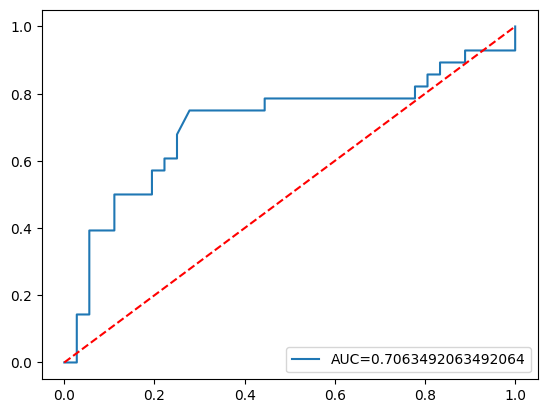

In [316]:
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, _ = metrics.roc_curve(y_wc, y_pred)
auc = metrics.roc_auc_score(y_wc, y_pred)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4)
plt.show()

In [342]:
WorldCup = pd.read_csv('WorldCup2022.csv')
WorldCup = WorldCup.replace({"IRAN": "Iran", 
                             "Costarica": "Costa Rica", 
                             "Porugal": "Portugal", 
                             "Columbia": "Colombia", 
                             "Korea" : "Korea Republic", 
                             "Netherland" : 'Netherlands'})
WorldCup['points'] = 0

In [343]:
WorldCup

,Team,Group,First match against,Second match against,Third match against,points
0,Qatar,A,Ecuador,Senegal,Netherlands,0
1,Ecuador,A,Qatar,Netherlands,Senegal,0
2,Senegal,A,Netherlands,Qatar,Ecuador,0
3,Netherlands,A,Senegal,Ecuador,Qatar,0
4,England,B,Iran,USA,Wales,0
5,Iran,B,England,Wales,USA,0
6,Wales,B,USA,Iran,England,0
7,USA,B,Wales,England,Iran,0
8,Poland,C,Mexico,Saudi Arabia,Argentina,0
9,Saudi Arabia,C,Argentina,Poland,Mexico,0


In [344]:
# Set up margin for 'draw' result
margin = 0.025

def prediction(row):
    if row['pred_win_prob'] < 0.5 - margin:
        return 'lose'
    elif row['pred_win_prob'] > 0.5 + margin:
        return 'win'
    else :
        return 'draw'

##### Group Stage Simulation

In [345]:
world_cup_2022_group_stage

,date,home_team,away_team,home_score,away_score,tournament,city,neutral,year,rank_home,...,tournament_ordinal,city_ordinal,country_ordinal,confederation_home_ordinal,confederation_away_ordinal,is_stake_ordinal,is_won_ordinal,is_draw_ordinal,is_lose_ordinal,pred_win_prob
125,2022-11-29,Wales,England,0,3,FIFA World Cup,Al Rayyan,True,2022,-1.057025,...,36,34,157,5,5,0.753752,0,0,1,0.155961
137,2022-12-01,Croatia,Belgium,0,0,FIFA World Cup,Al Rayyan,True,2022,-1.148246,...,36,34,157,5,5,0.753752,0,1,0,0.149466
143,2022-11-22,Mexico,Poland,0,0,FIFA World Cup,Doha,True,2022,-1.202979,...,36,391,157,2,5,0.753752,0,1,0,0.446322
148,2022-11-21,Senegal,Netherlands,0,2,FIFA World Cup,Doha,True,2022,-1.093514,...,36,391,157,1,5,0.753752,0,0,1,0.162317
149,2022-11-29,Qatar,Netherlands,0,2,FIFA World Cup,Al Khor,False,2022,-0.473212,...,36,33,157,0,5,0.753752,0,0,1,0.189476
160,2022-11-25,Wales,Iran,0,2,FIFA World Cup,Al Rayyan,True,2022,-1.057025,...,36,34,157,5,0,0.753752,0,0,1,0.332263
161,2022-11-21,England,Iran,6,2,FIFA World Cup,Al Rayyan,True,2022,-1.330688,...,36,34,157,5,0,0.753752,1,0,0,0.620098
624,2022-12-01,Costa Rica,Germany,2,4,FIFA World Cup,Al Khor,True,2022,-0.655653,...,36,33,157,2,5,0.753752,0,0,1,0.144467
626,2022-11-27,Spain,Germany,1,1,FIFA World Cup,Al Khor,True,2022,-1.294200,...,36,33,157,5,5,0.753752,0,1,0,0.403340
644,2022-11-24,Brazil,Serbia,2,0,FIFA World Cup,Lusail,True,2022,-1.385420,...,36,778,157,3,5,0.753752,1,0,0,0.760066


In [346]:
world_cup_2022_group_stage = world_cup_2022[world_cup_2022['date'] < '2022-12-03']

In [347]:
data = None
for group in WorldCup['Group'].dropna().unique():
    datum = world_cup_2022_group_stage.sort_values(by=['date'])[['home_team', 'away_team', 'is_won', 'is_draw', 'is_lose', 'pred_win_prob']][world_cup_2022['home_team'].isin(WorldCup['Team'][WorldCup['Group'] == group]) & 
                                                                                                       world_cup_2022['away_team'].isin(WorldCup['Team'][WorldCup['Group'] == group])]
    datum['Group'] = group
    datum['pred'] = datum.apply(prediction, axis=1)
    for i in range(6):
        if datum.iloc[i]['pred'] == 'win':
            WorldCup['points'][WorldCup['Team'] == datum.iloc[i]['home_team']] += 3
        elif datum.iloc[i]['pred'] == 'draw':
            WorldCup['points'][WorldCup['Team'] == datum.iloc[i]['home_team']] += 1
            WorldCup['points'][WorldCup['Team'] == datum.iloc[i]['away_team']] += 1
        elif datum.iloc[i]['pred'] == 'lose':
            WorldCup['points'][WorldCup['Team'] == datum.iloc[i]['away_team']] += 3
        
    data = pd.concat([data, datum])

print(len(data))
print(data.to_markdown())

48
|       | home_team      | away_team      | is_won   | is_draw   | is_lose   |   pred_win_prob | Group   | pred   |
|------:|:---------------|:---------------|:---------|:----------|:----------|----------------:|:--------|:-------|
|  4169 | Qatar          | Ecuador        | False    | False     | True      |       0.302863  | A       | lose   |
|   148 | Senegal        | Netherlands    | False    | False     | True      |       0.162317  | A       | lose   |
|  9807 | Qatar          | Senegal        | False    | False     | True      |       0.349869  | A       | lose   |
|  4165 | Netherlands    | Ecuador        | False    | True      | False     |       0.548641  | A       | win    |
|  9809 | Ecuador        | Senegal        | False    | False     | True      |       0.394828  | A       | lose   |
|   149 | Qatar          | Netherlands    | False    | False     | True      |       0.189476  | A       | lose   |
|   161 | England        | Iran           | True     | False     | Fa

C:\Users\Simon\AppData\Local\Temp\ipykernel_12952\4005379888.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  datum = world_cup_2022_group_stage.sort_values(by=['date'])[['home_team', 'away_team', 'is_won', 'is_draw', 'is_lose', 'pred_win_prob']][world_cup_2022['home_team'].isin(WorldCup['Team'][WorldCup['Group'] == group]) &
C:\Users\Simon\AppData\Local\Temp\ipykernel_12952\4005379888.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WorldCup['points'][WorldCup['Team'] == datum.iloc[i]['away_team']] += 3
C:\Users\Simon\AppData\Local\Temp\ipykernel_12952\4005379888.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [348]:
WorldCup[['Team', 'Group', 'points']].dropna().sort_values(by=['Group', 'points'], ascending=False)

,Team,Group,points
29,Korea Republic,H,6
30,Uruguay,H,6
31,Portugal,H,6
28,Ghana,H,0
27,Brazil,G,9
26,Switzerland,G,6
24,Serbia,G,3
25,Cameroon,G,0
22,Belgium,F,9
20,Croatia,F,4


In [349]:
WorldCup[['Team', 'Group', 'points']].dropna().sort_values(by=['points'], ascending=False).groupby('Group').head(2).sort_values(by=['Group'])

,Team,Group,points
3,Netherlands,A,9
2,Senegal,A,6
4,England,B,9
7,USA,B,3
10,Argentina,C,7
11,Mexico,C,4
12,France,D,7
14,Denmark,D,7
19,Germany,E,9
18,Spain,E,6


##### Round of 16 result comparison

In [350]:
world_cup_2022_r16 = world_cup_2022[(world_cup_2022['date'] > '2022-12-02') & (world_cup_2022['date'] < '2022-12-07')]

In [351]:
world_cup_2022_r16

,date,home_team,away_team,home_score,away_score,tournament,city,neutral,year,rank_home,...,tournament_ordinal,city_ordinal,country_ordinal,confederation_home_ordinal,confederation_away_ordinal,is_stake_ordinal,is_won_ordinal,is_draw_ordinal,is_lose_ordinal,pred_win_prob
142,2022-12-04,France,Poland,3,1,FIFA World Cup,Doha,True,2022,-1.367176,...,36,391,157,5,5,0.753752,1,0,0,0.773745
4156,2022-12-03,Netherlands,USA,3,1,FIFA World Cup,Al Rayyan,True,2022,-1.239467,...,36,34,157,5,2,0.753752,1,0,0,0.446322
7426,2022-12-06,Morocco,Spain,0,0,FIFA World Cup,Al Rayyan,True,2022,-0.984049,...,36,34,157,1,5,0.753752,0,1,0,0.140099
7434,2022-12-05,Japan,Croatia,1,1,FIFA World Cup,Al Wakrah,True,2022,-1.002293,...,36,35,157,0,5,0.753752,0,1,0,0.244661
9135,2022-12-03,Argentina,Australia,2,1,FIFA World Cup,Al Rayyan,True,2022,-1.348932,...,36,34,157,3,0,0.753752,1,0,0,0.770509
9801,2022-12-06,Portugal,Switzerland,6,1,FIFA World Cup,Lusail,True,2022,-1.275955,...,36,778,157,5,5,0.753752,1,0,0,0.322464
9804,2022-12-04,England,Senegal,3,0,FIFA World Cup,Al Khor,True,2022,-1.330688,...,36,33,157,5,1,0.753752,1,0,0,0.764672
12249,2022-12-05,Brazil,Korea Republic,4,1,FIFA World Cup,Doha,True,2022,-1.385420,...,36,391,157,3,0,0.753752,1,0,0,0.834568


In [352]:
data = world_cup_2022_r16.sort_values(by=['date'])[['home_team', 'away_team', 'is_won', 'is_draw', 'is_lose', 'pred_win_prob']]
data['pred'] = data.apply(prediction, axis=1)
data

,home_team,away_team,is_won,is_draw,is_lose,pred_win_prob,pred
4156,Netherlands,USA,True,False,False,0.446322,lose
9135,Argentina,Australia,True,False,False,0.770509,win
142,France,Poland,True,False,False,0.773745,win
9804,England,Senegal,True,False,False,0.764672,win
7434,Japan,Croatia,False,True,False,0.244661,lose
12249,Brazil,Korea Republic,True,False,False,0.834568,win
7426,Morocco,Spain,False,True,False,0.140099,lose
9801,Portugal,Switzerland,True,False,False,0.322464,lose


##### Quarter Final result comparison

In [355]:
world_cup_2022_r8 = world_cup_2022[(world_cup_2022['date'] > '2022-12-07') & (world_cup_2022['date'] < '2022-12-11')]

In [356]:
data = world_cup_2022_r8.sort_values(by=['date'])[['home_team', 'away_team', 'is_won', 'is_draw', 'is_lose', 'pred_win_prob']]
data['pred'] = data.apply(prediction, axis=1)
data

,home_team,away_team,is_won,is_draw,is_lose,pred_win_prob,pred
1816,Netherlands,Argentina,False,True,False,0.180388,lose
7429,Croatia,Brazil,False,True,False,0.118430,lose
8736,England,France,False,False,True,0.232882,lose
10470,Morocco,Portugal,True,False,False,0.153035,lose


##### Semi-Final result comparison

In [357]:
world_cup_2022_r4 = world_cup_2022[(world_cup_2022['date'] > '2022-12-11') & (world_cup_2022['date'] < '2022-12-15')]

In [358]:
data = world_cup_2022_r4.sort_values(by=['date'])[['home_team', 'away_team', 'is_won', 'is_draw', 'is_lose', 'pred_win_prob']]
data['pred'] = data.apply(prediction, axis=1)
data

,home_team,away_team,is_won,is_draw,is_lose,pred_win_prob,pred
7438,Argentina,Croatia,True,False,False,0.601005,win
3788,France,Morocco,True,False,False,0.766399,win


##### Second runner-up result comparison

In [359]:
world_cup_2022_third = world_cup_2022[(world_cup_2022['date'] == '2022-12-17')]

In [360]:
data = world_cup_2022_third.sort_values(by=['date'])[['home_team', 'away_team', 'is_won', 'is_draw', 'is_lose', 'pred_win_prob']]
data['pred'] = data.apply(prediction, axis=1)
data

,home_team,away_team,is_won,is_draw,is_lose,pred_win_prob,pred
3787,Croatia,Morocco,True,False,False,0.452725,lose


##### Champion result comparison

In [361]:
world_cup_2022_champion = world_cup_2022[(world_cup_2022['date'] == '2022-12-18')]

In [362]:
data = world_cup_2022_champion.sort_values(by=['date'])[['home_team', 'away_team', 'is_won', 'is_draw', 'is_lose', 'pred_win_prob']]
data['pred'] = data.apply(prediction, axis=1)
data

,home_team,away_team,is_won,is_draw,is_lose,pred_win_prob,pred
8738,Argentina,France,False,True,False,0.28244,lose
